# Application of Gradient Boosted Random Forests on the Prediction of Heart Failure
by **Bitoon G.**, **Herrera J.**, **Medrano L.**, and **Lozada R.**

## Exploratory Data Analysis

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Importing the dataset

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

### Feature Information
- `age`: Age of the patient (years)
- `anaemia`: Decrease of red blood cells or hemoglobin (boolean)
- `creatinine_phosphokinase` (CPK): Level of the CPK enzyme in the blood (mcg/L)
- `diabetes`: If the patient has diabetes (boolean)
- `ejection_fraction`: Percentage of blood leaving the heart at each contraction (percentage)
- `high blood pressure`: If the patient has hypertension (boolean)
- `platelets`: Platelets in the blood (kiloplatelets/mL)
- `serum_creatinine`: Level of serum creatinine in the blood (mg/dL)
- `serum_sodium`: Level of serum sodium in the blood (mEq/L)
- `sex`: Woman or man (binary)
- `smoking`: If the patient smokes or not (boolean)
- `time`: Follow-up period (days)
- `DEATH_EVENT`: If the patient deceased during the follow-up period (boolean)  

### `age` Feature Analysis 

In [1]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Age of the patient (years)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()
plt.show()

NameError: name 'plt' is not defined

### `anaemia` Feature Analysis 

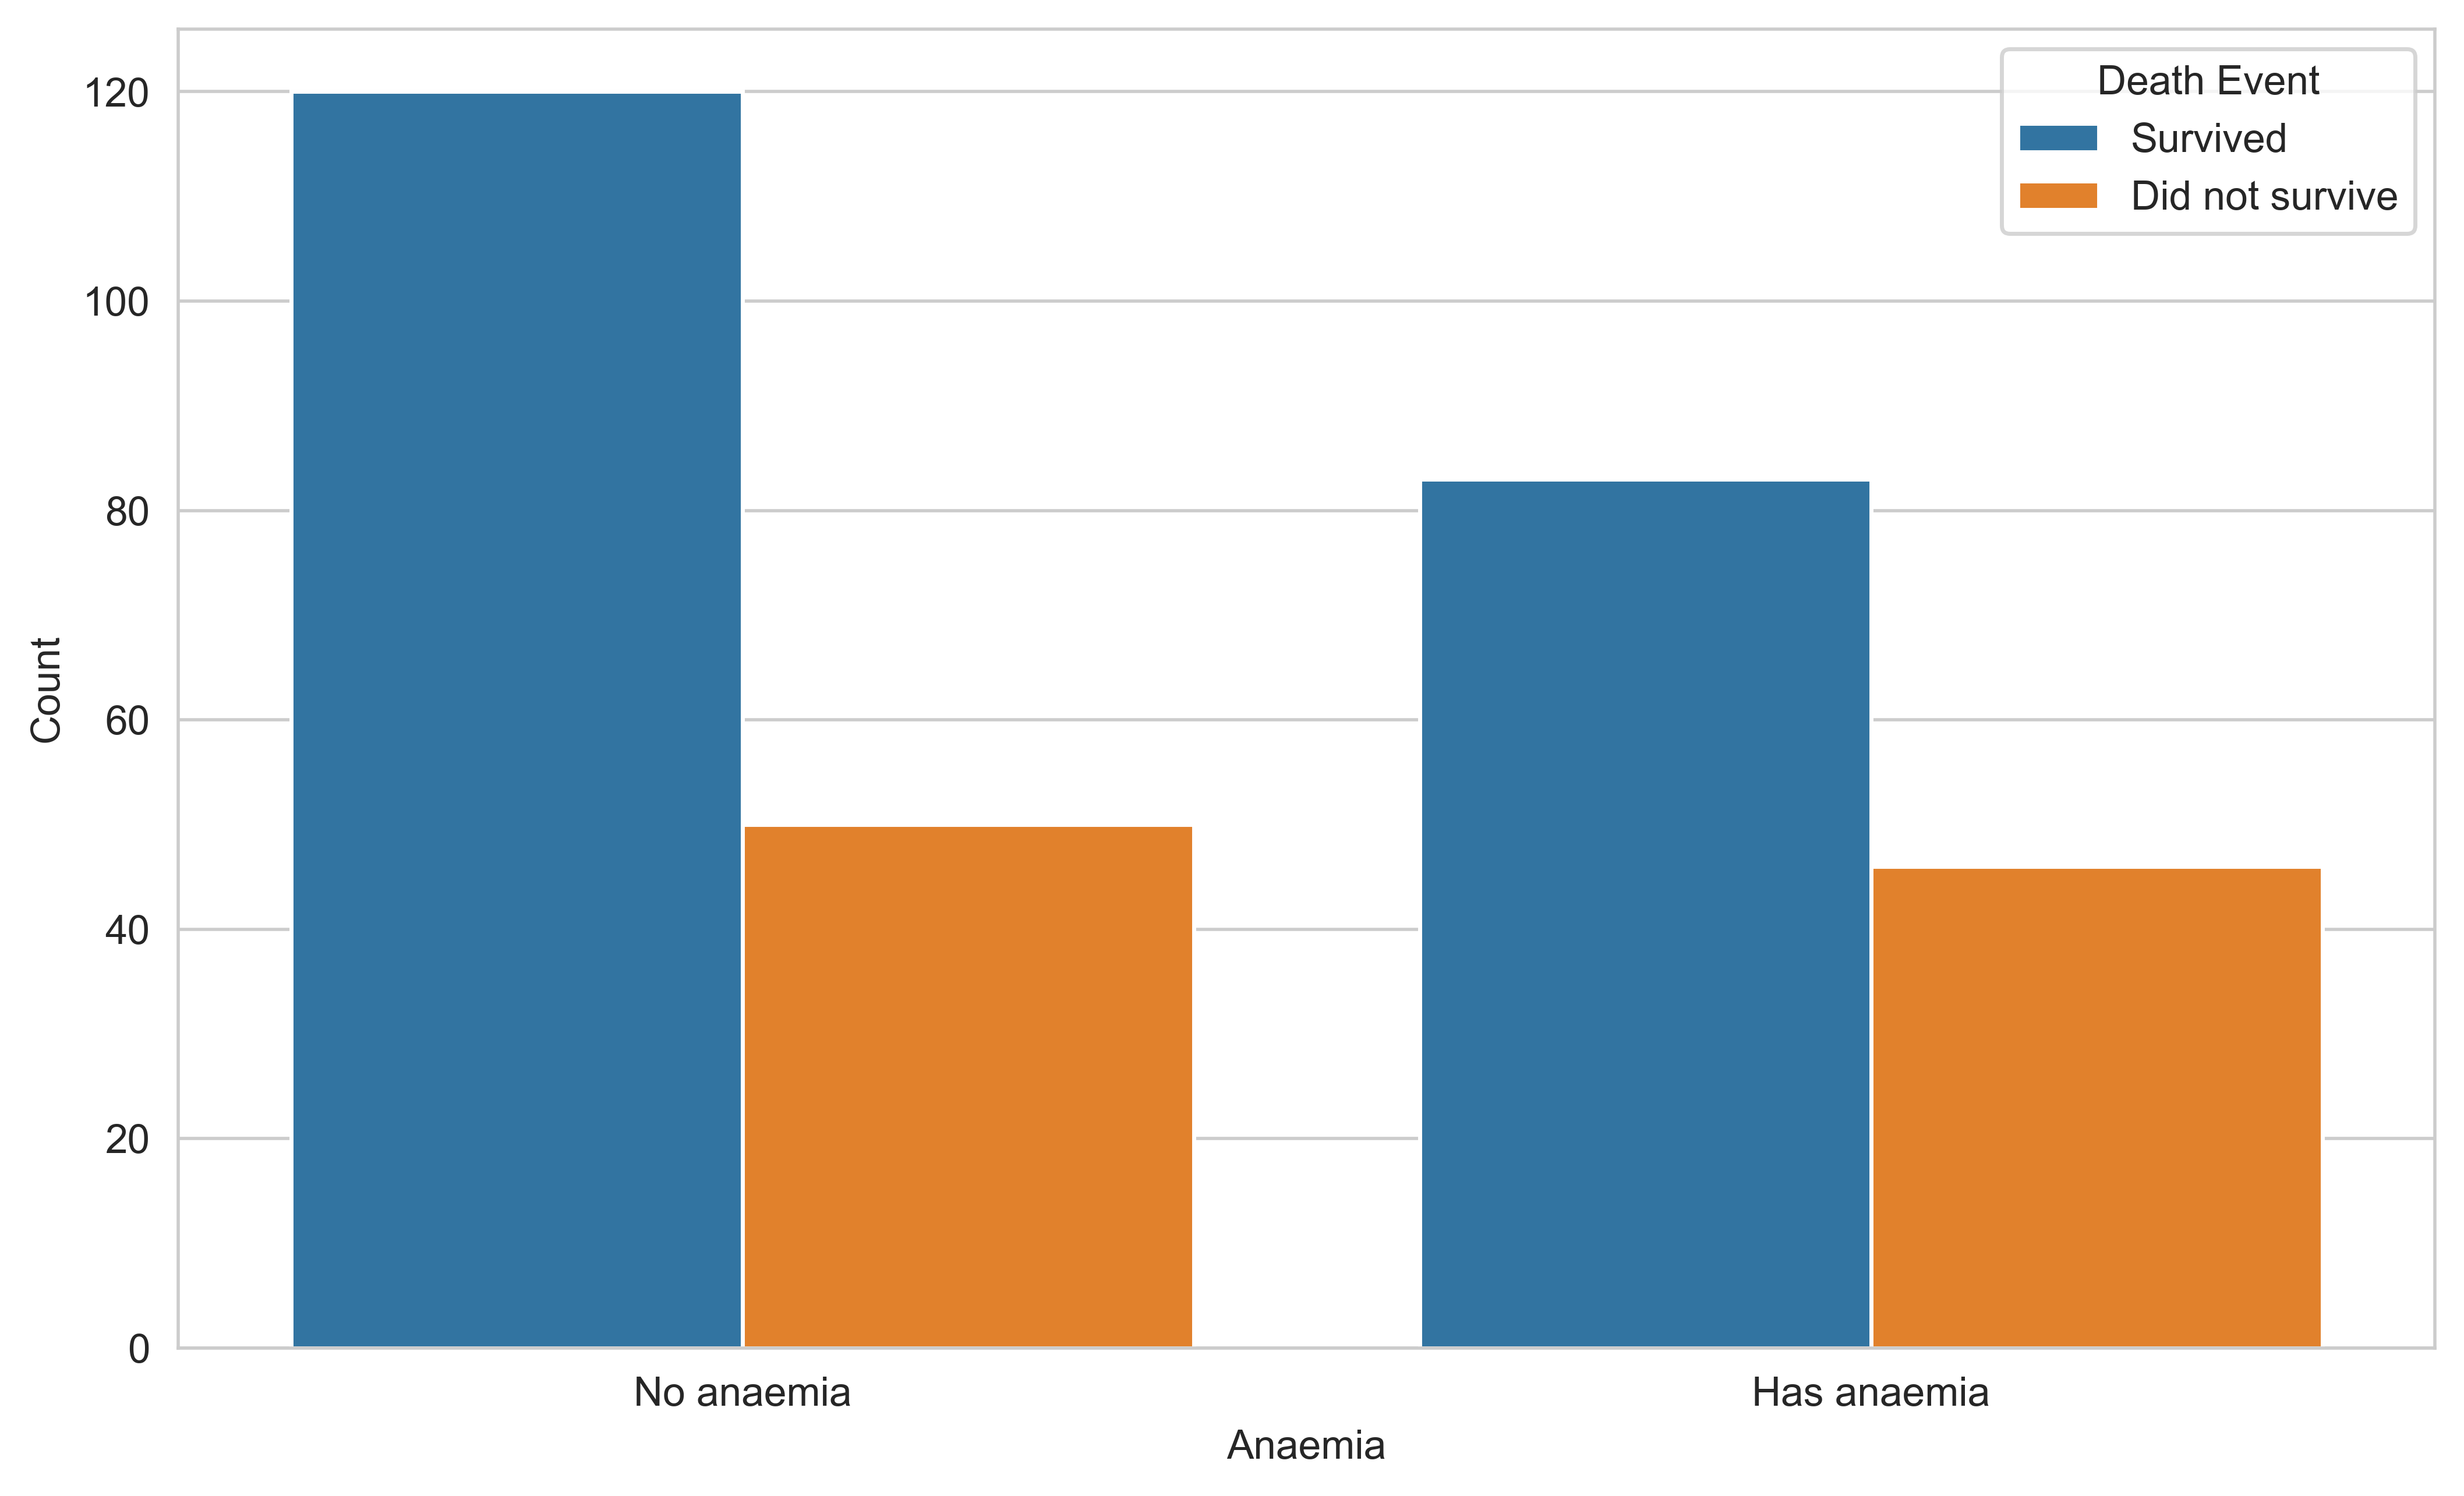

In [5]:
plt.figure(figsize=(10,6), dpi=500)
sns.countplot(data=df, x='anaemia', hue='DEATH_EVENT')

plt.xlabel('Anaemia')
plt.ylabel('Count')
plt.xticks([0, 1], ['No anaemia', 'Has anaemia'])
plt.legend(title='Death Event', loc='best', labels=['Survived', 'Did not survive'])
plt.show()

### `creatinine_phosphokinase` Feature Analysis 

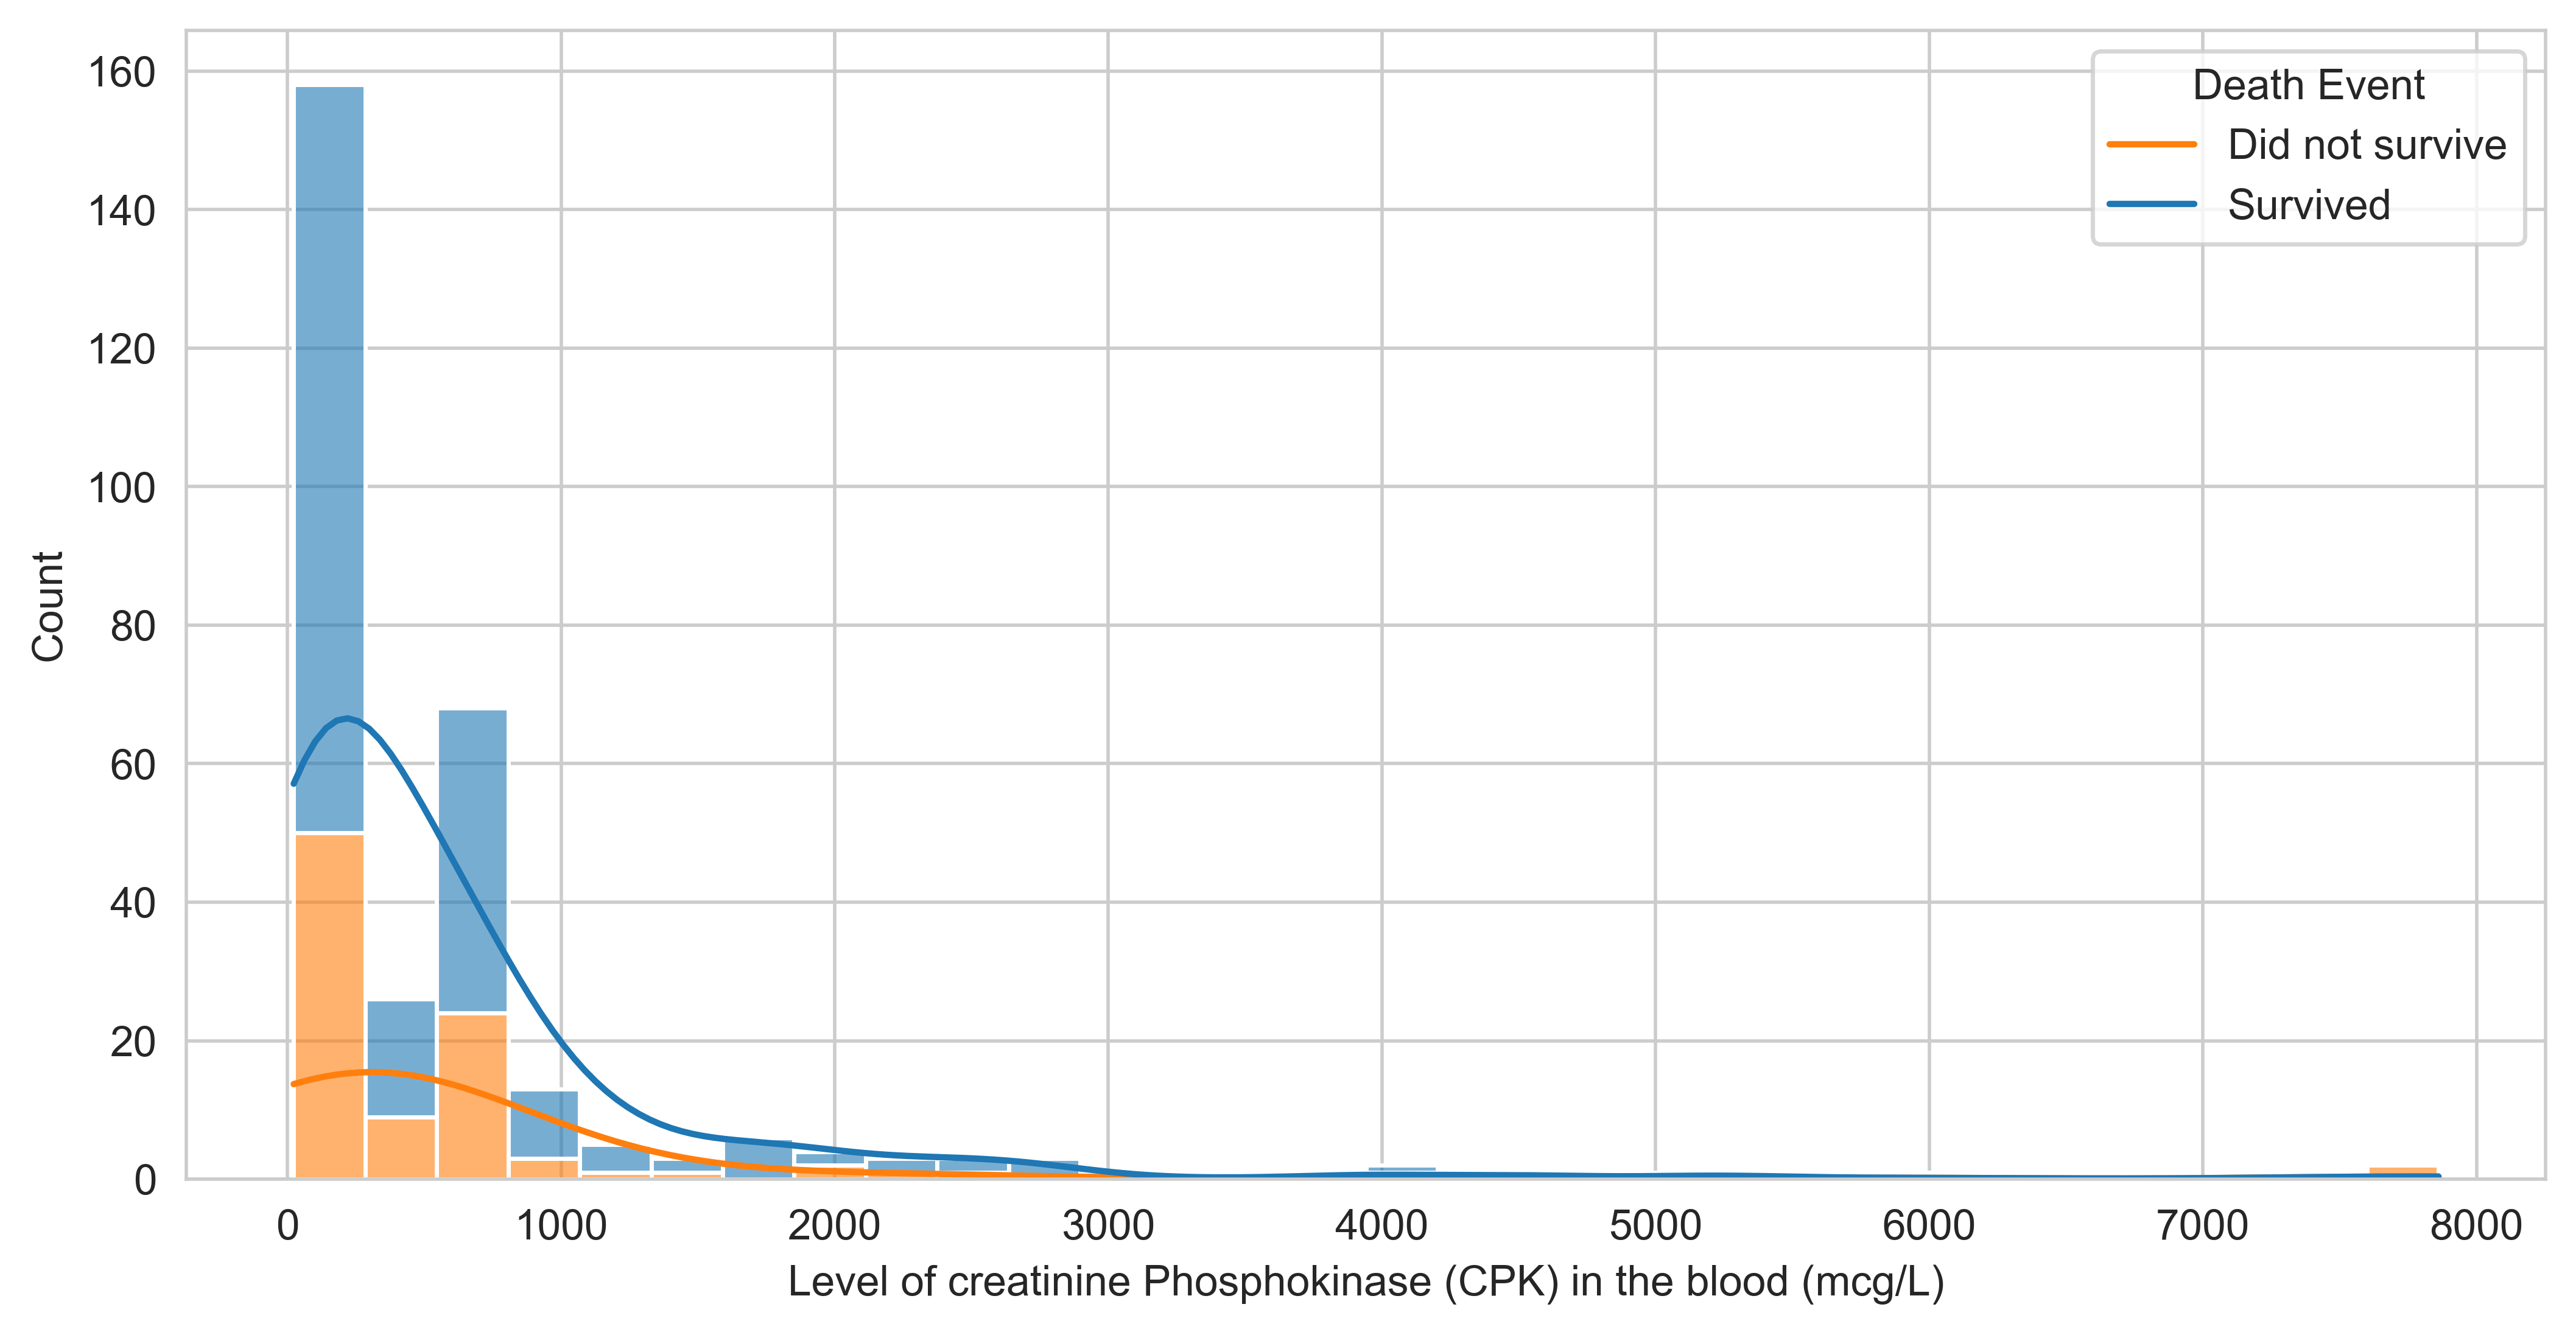

In [6]:
plt.figure(figsize=(10, 5), dpi=500)
sns.histplot(data=df, x='creatinine_phosphokinase', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Level of creatinine Phosphokinase (CPK) in the blood (mcg/L)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### `diabetes` Feature Analysis 

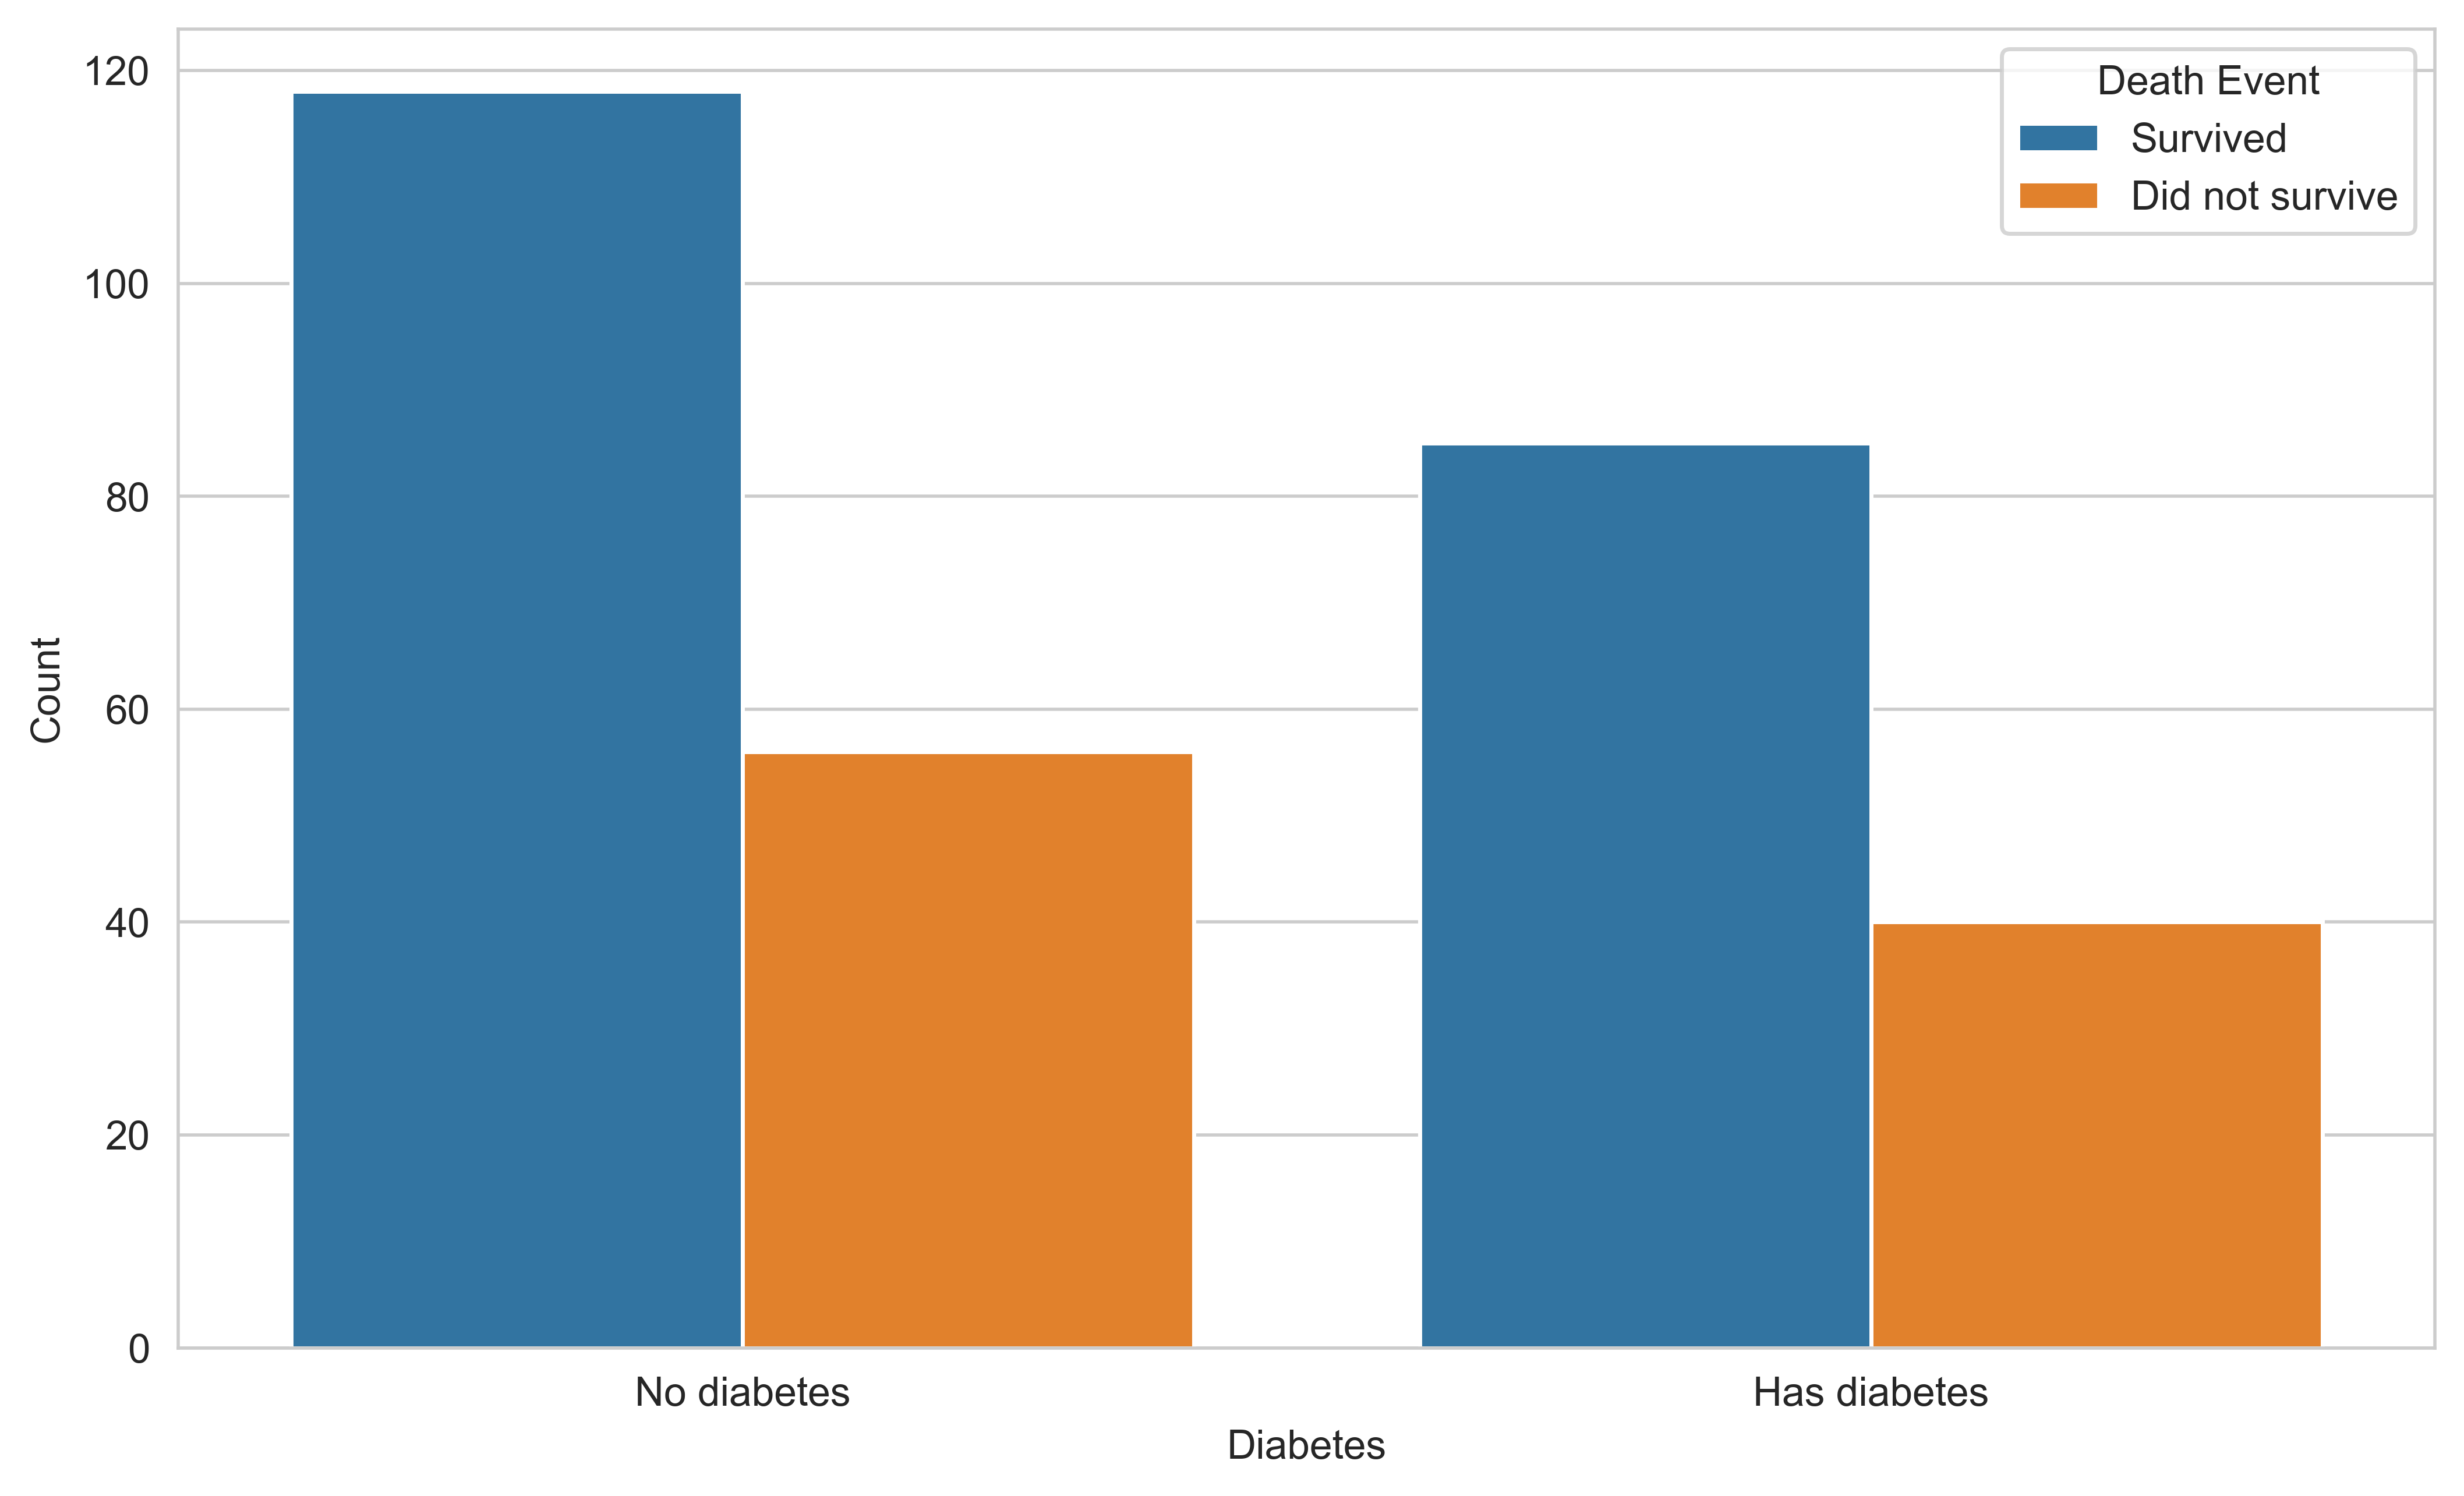

In [7]:
plt.figure(figsize=(10,6), dpi=500)
sns.countplot(data=df, x='diabetes', hue='DEATH_EVENT')

plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0, 1], ['No diabetes', 'Has diabetes'])
plt.legend(title='Death Event', loc='best', labels=['Survived', 'Did not survive'])
plt.show()

### `ejection_fraction` Feature Analysis 

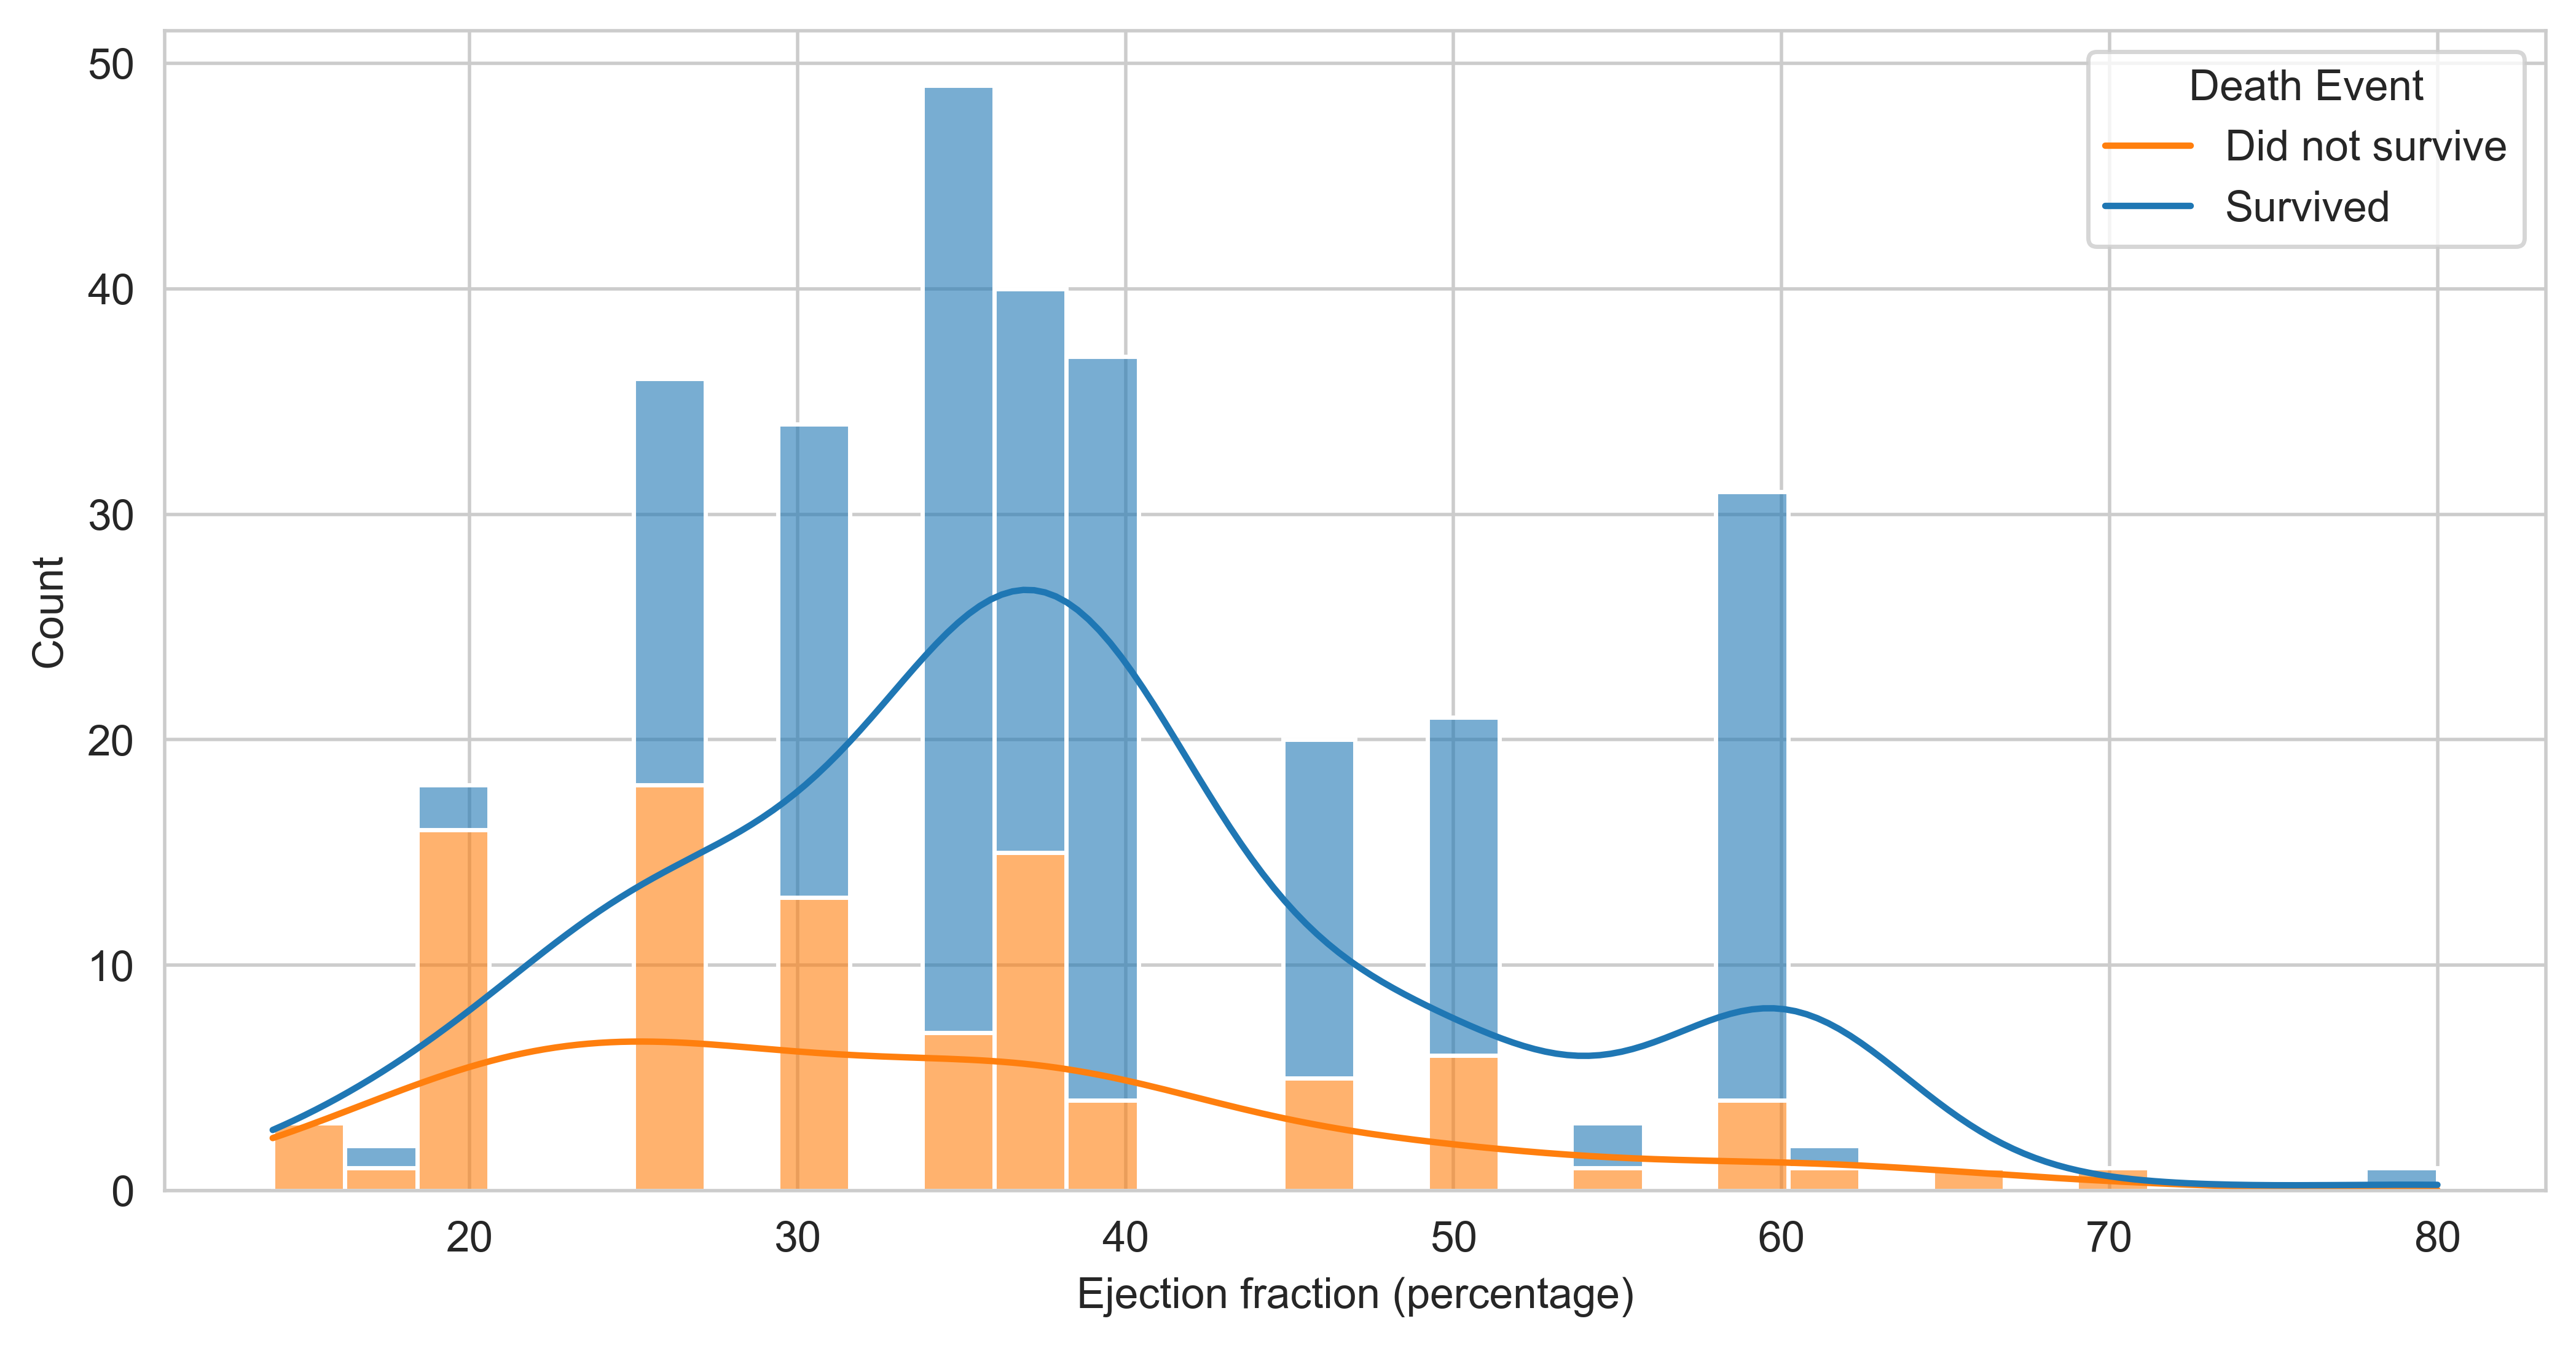

In [8]:
plt.figure(figsize=(10, 5), dpi=500)
sns.histplot(data=df, x='ejection_fraction', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Ejection fraction (percentage)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### `high_blood_pressure` Feature Analysis

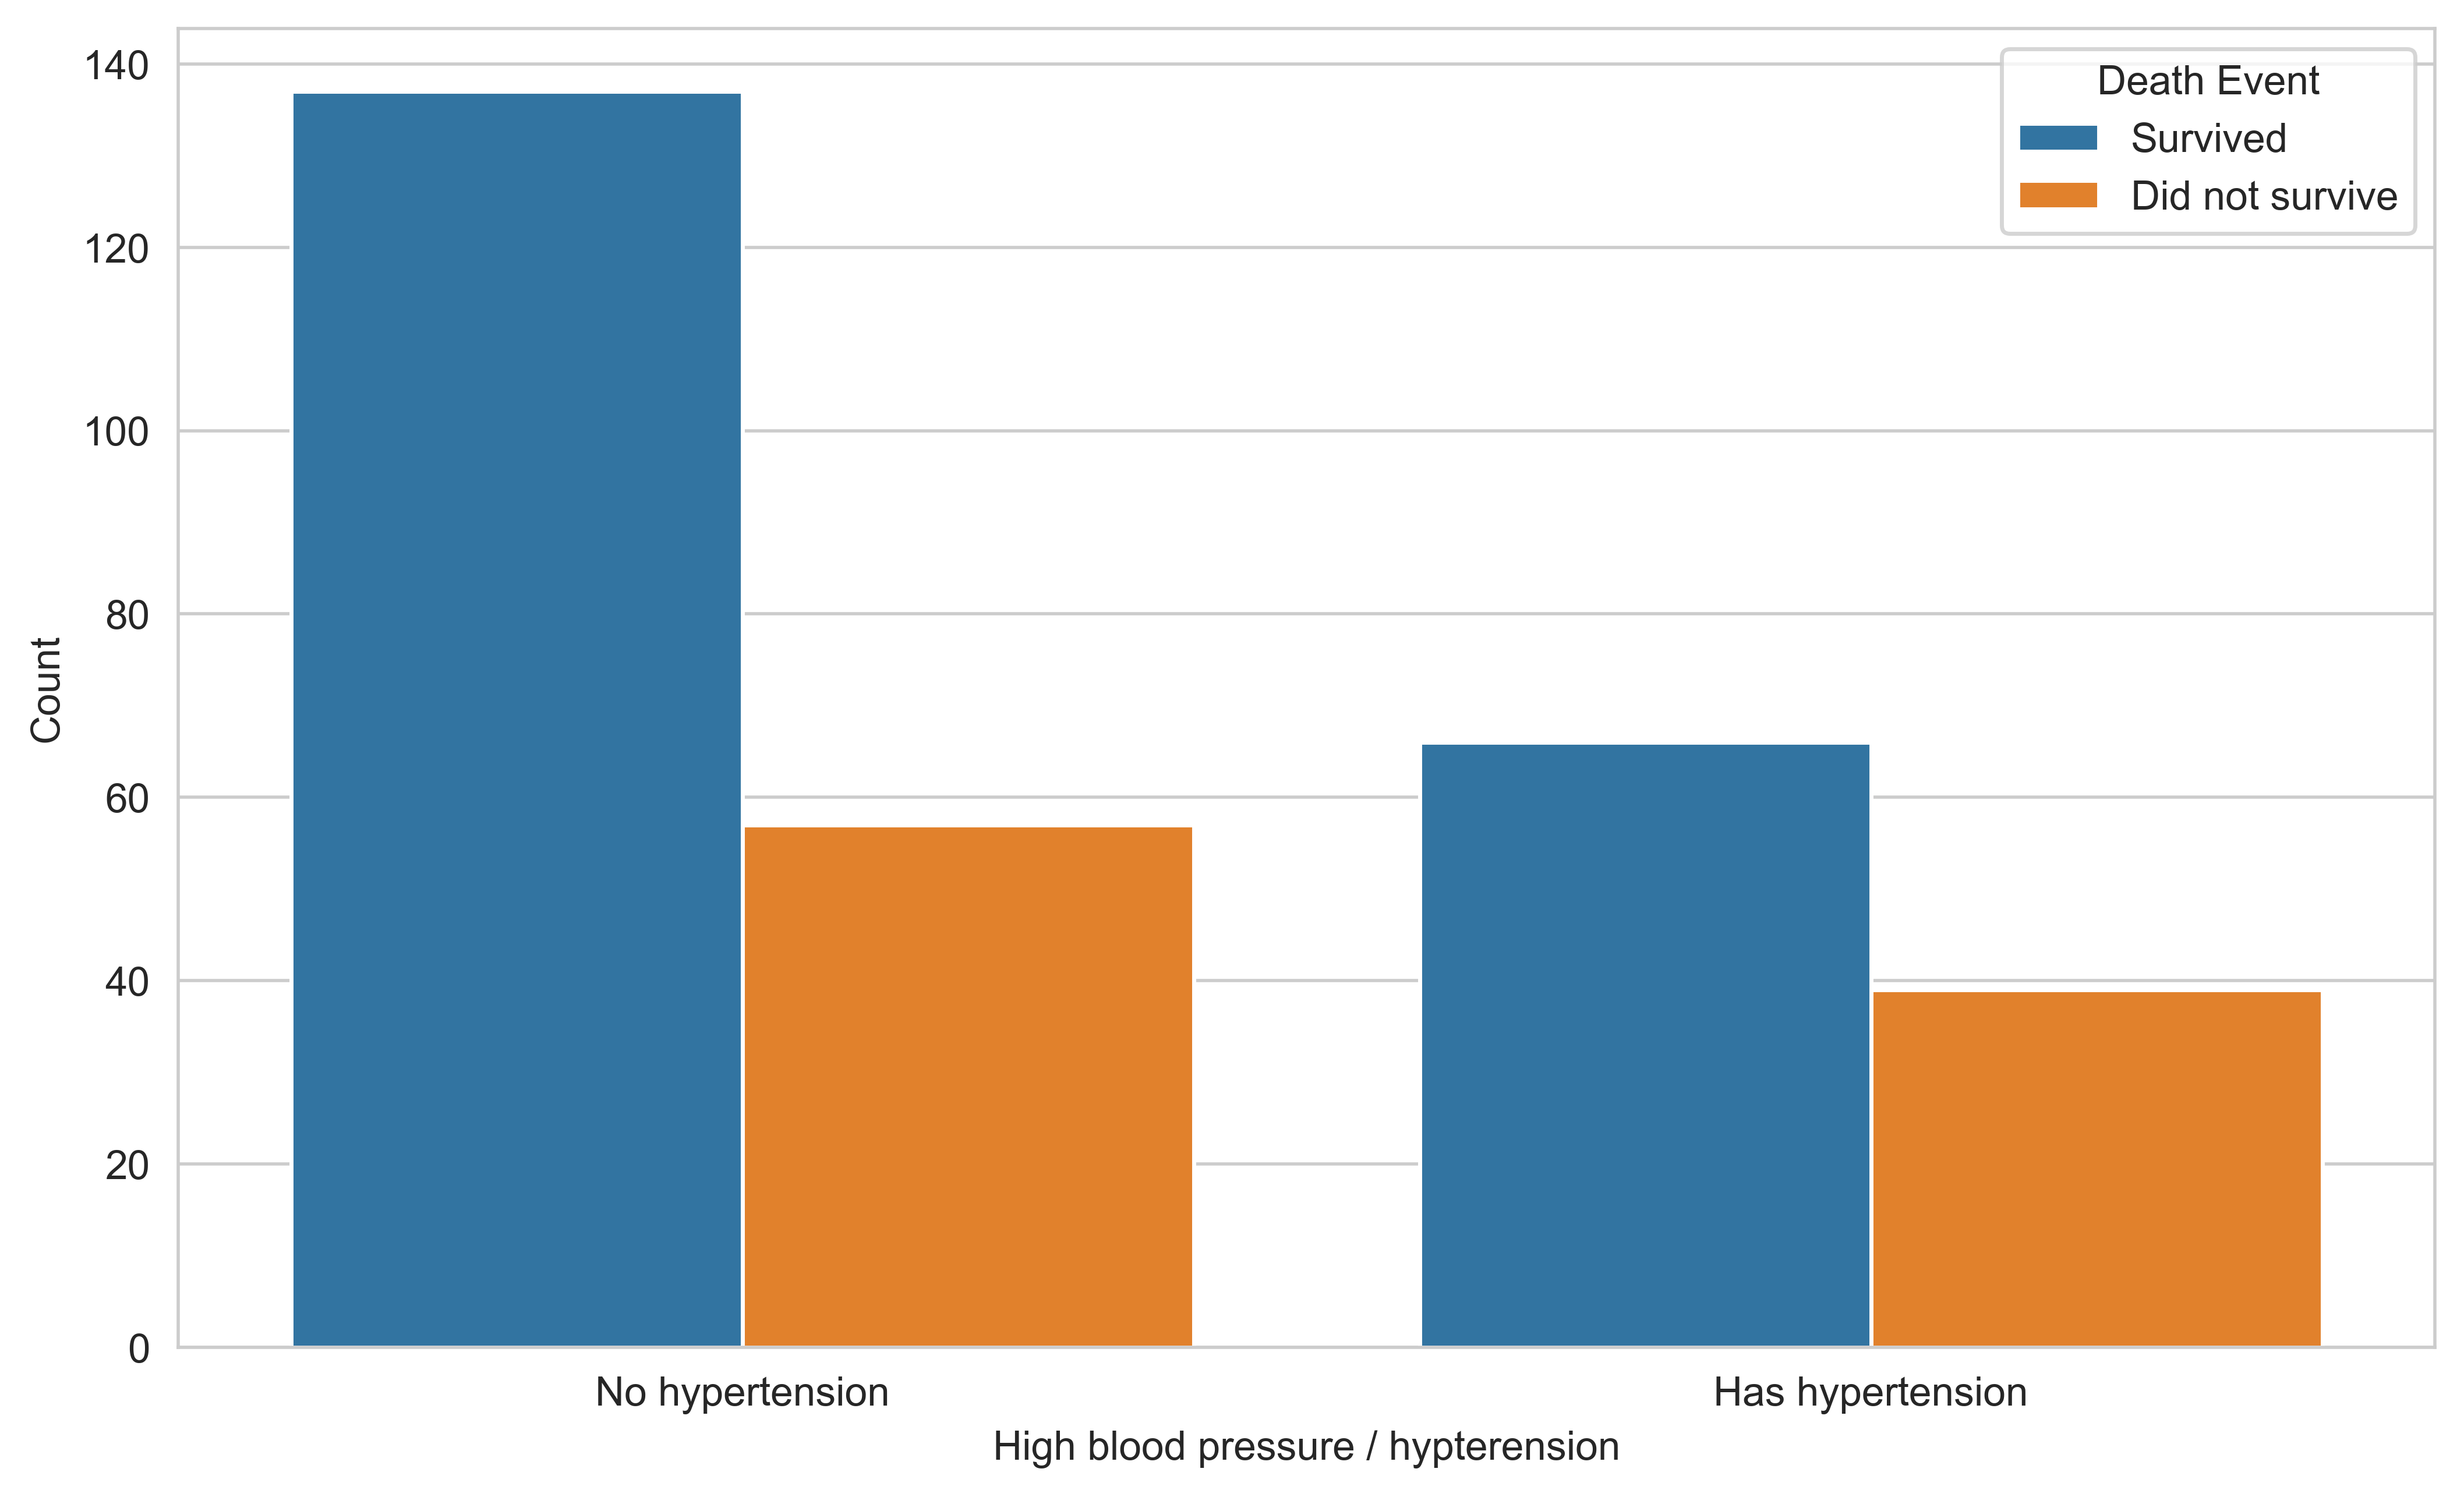

In [9]:
plt.figure(figsize=(10,6), dpi=500)
sns.countplot(data=df, x='high_blood_pressure', hue='DEATH_EVENT')

plt.xlabel('High blood pressure / hypterension')
plt.ylabel('Count')
plt.xticks([0, 1], ['No hypertension', 'Has hypertension'])
plt.legend(title='Death Event', loc='best', labels=['Survived', 'Did not survive'])
plt.show()

### `platelets` Feature Analysis

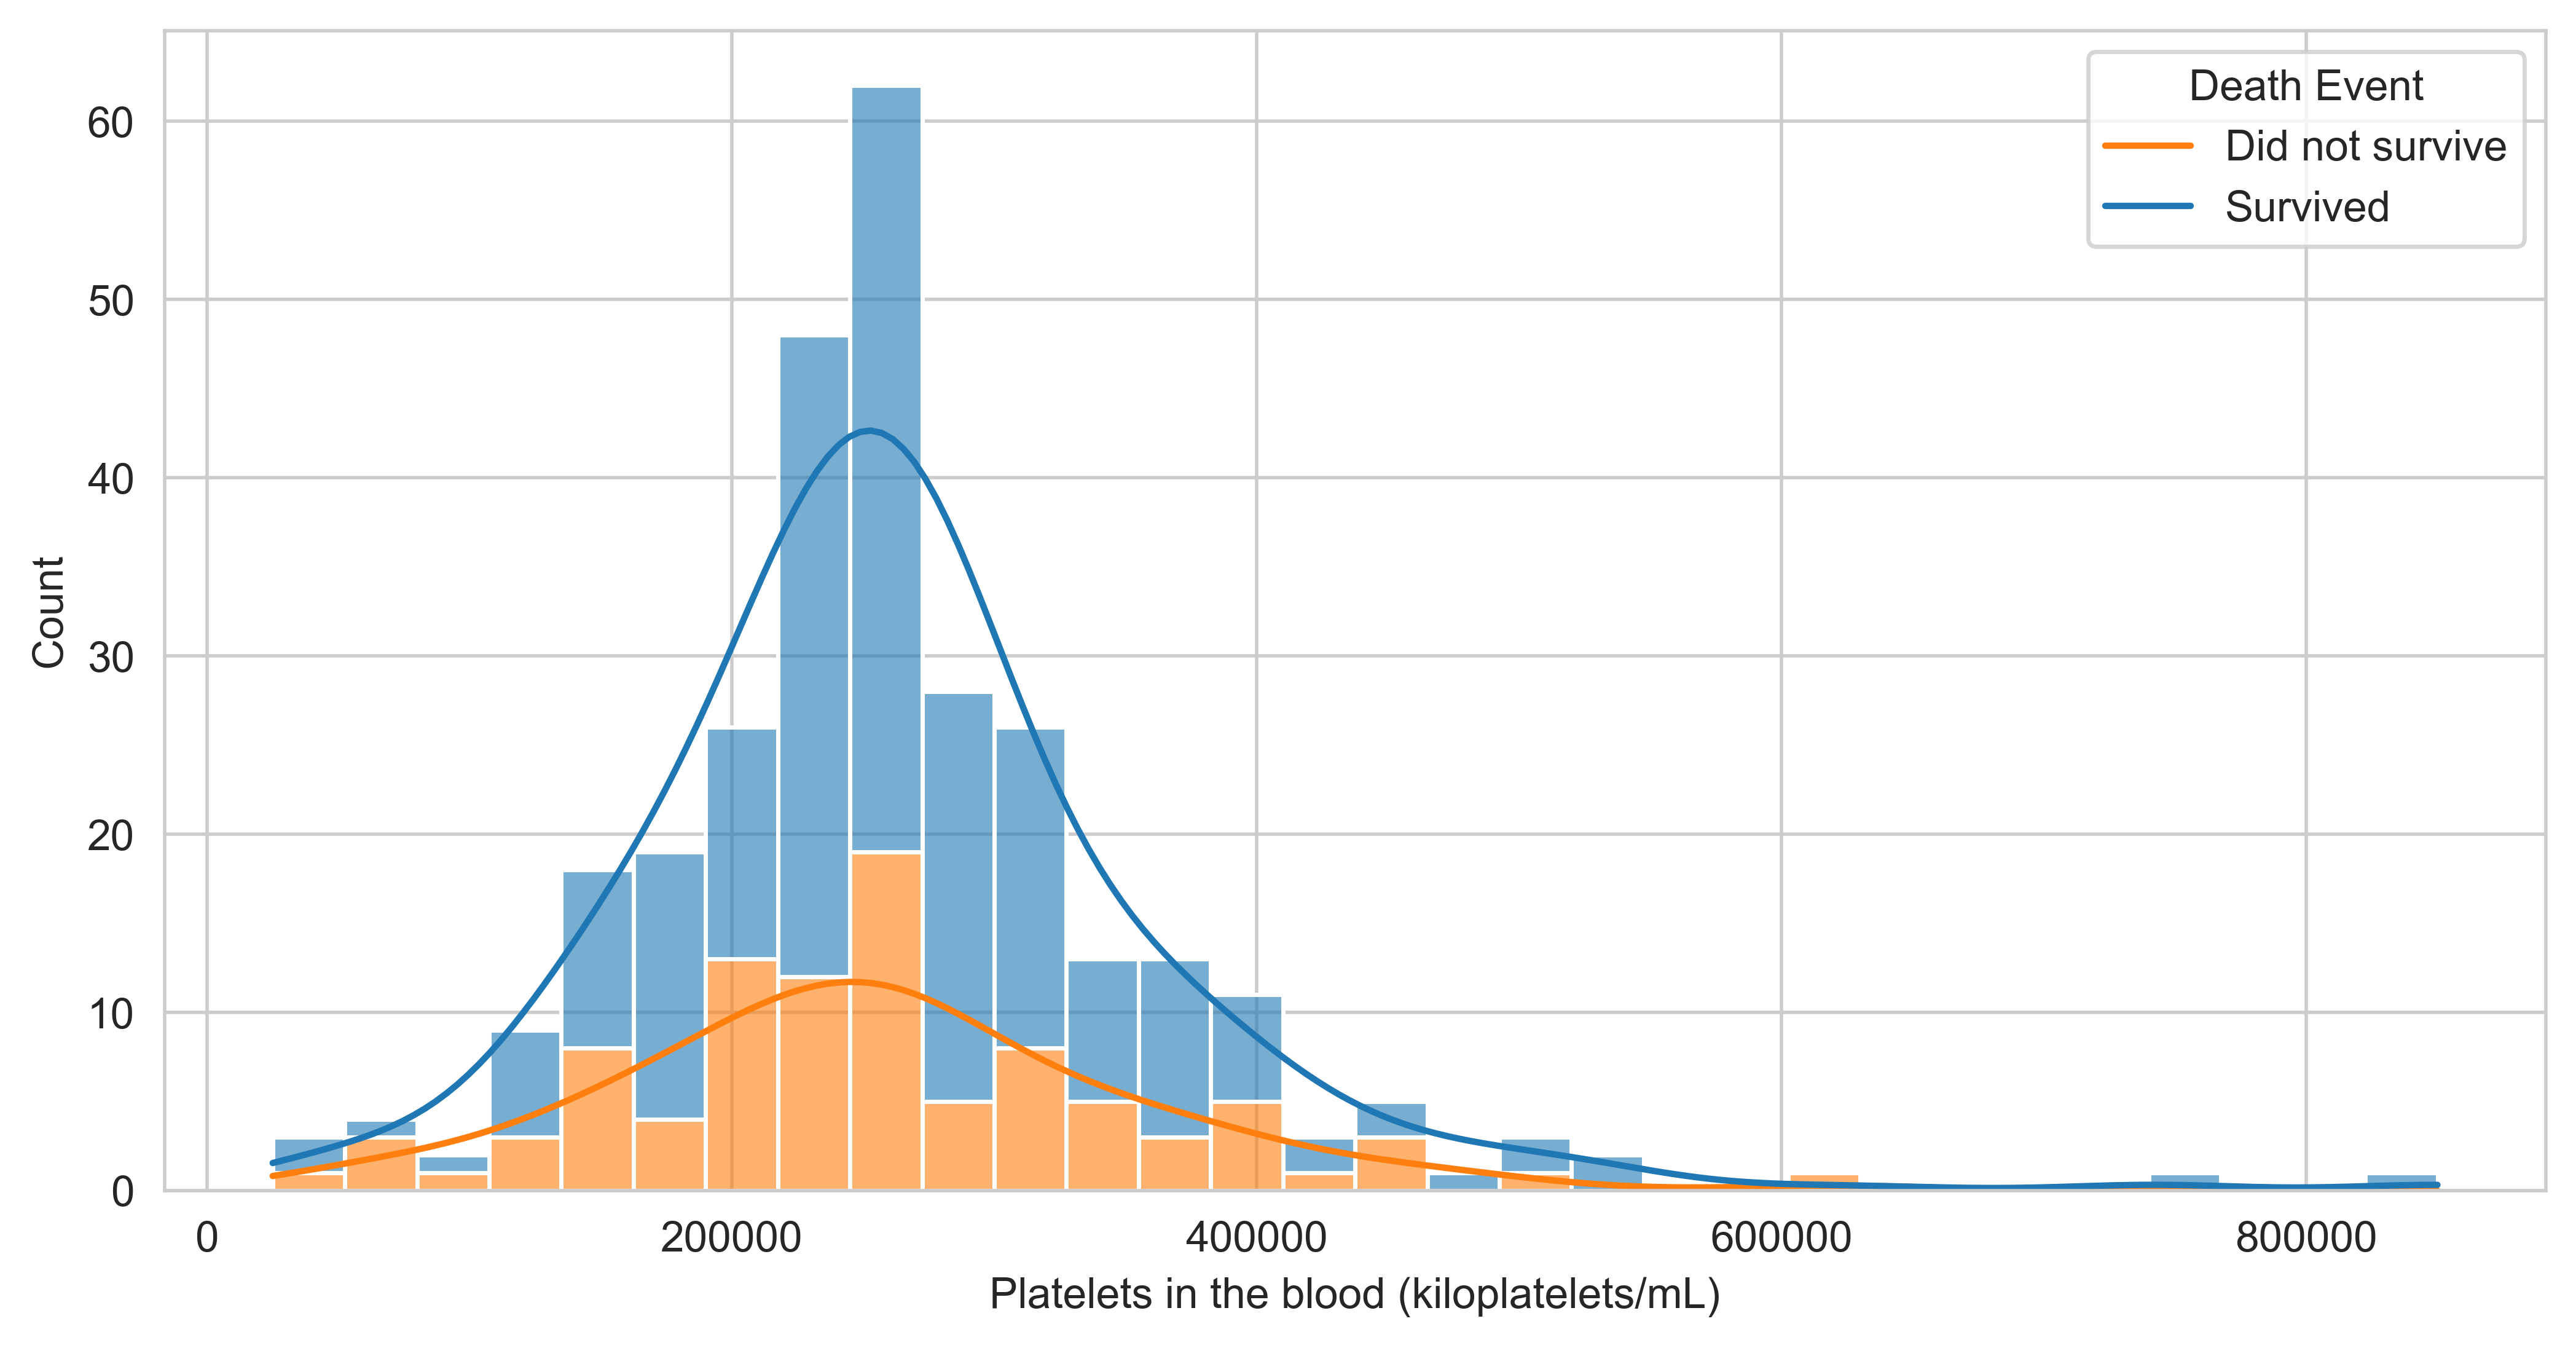

In [10]:
plt.figure(figsize=(10, 5), dpi=500)
sns.histplot(data=df, x='platelets', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Platelets in the blood (kiloplatelets/mL)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### `serum_creatinine ` Feature Analysis

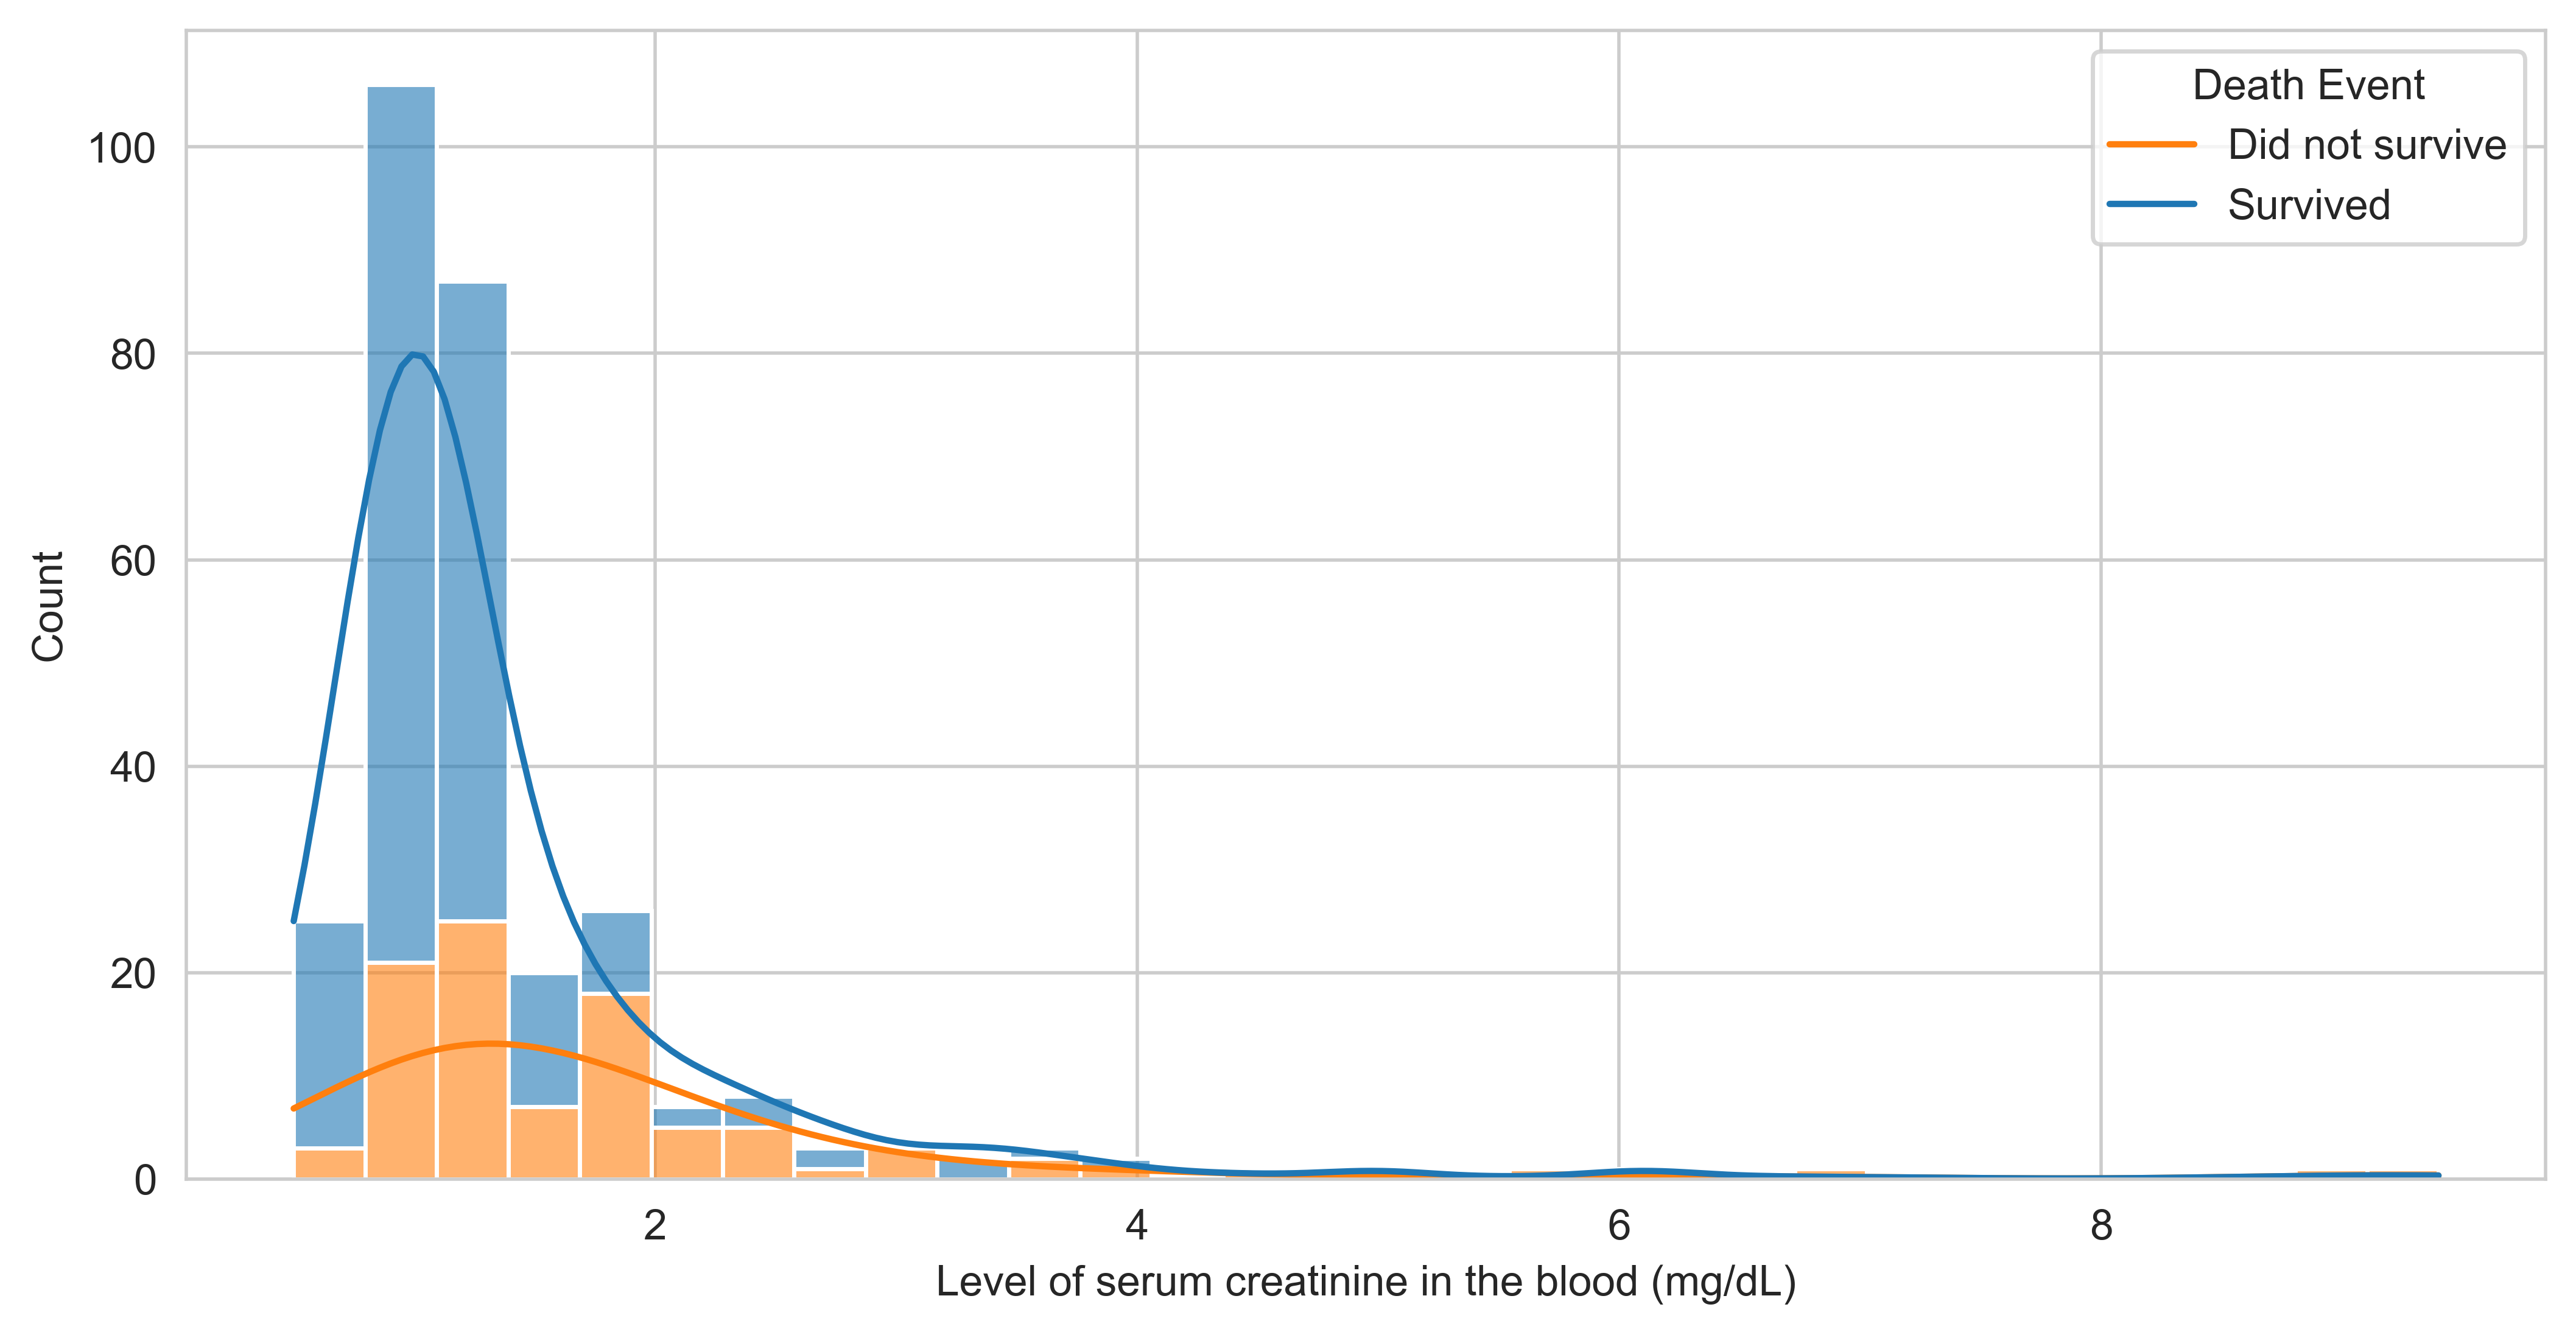

In [11]:
plt.figure(figsize=(10, 5), dpi=500)
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Level of serum creatinine in the blood (mg/dL)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### `serum_sodium` Feature Analysis

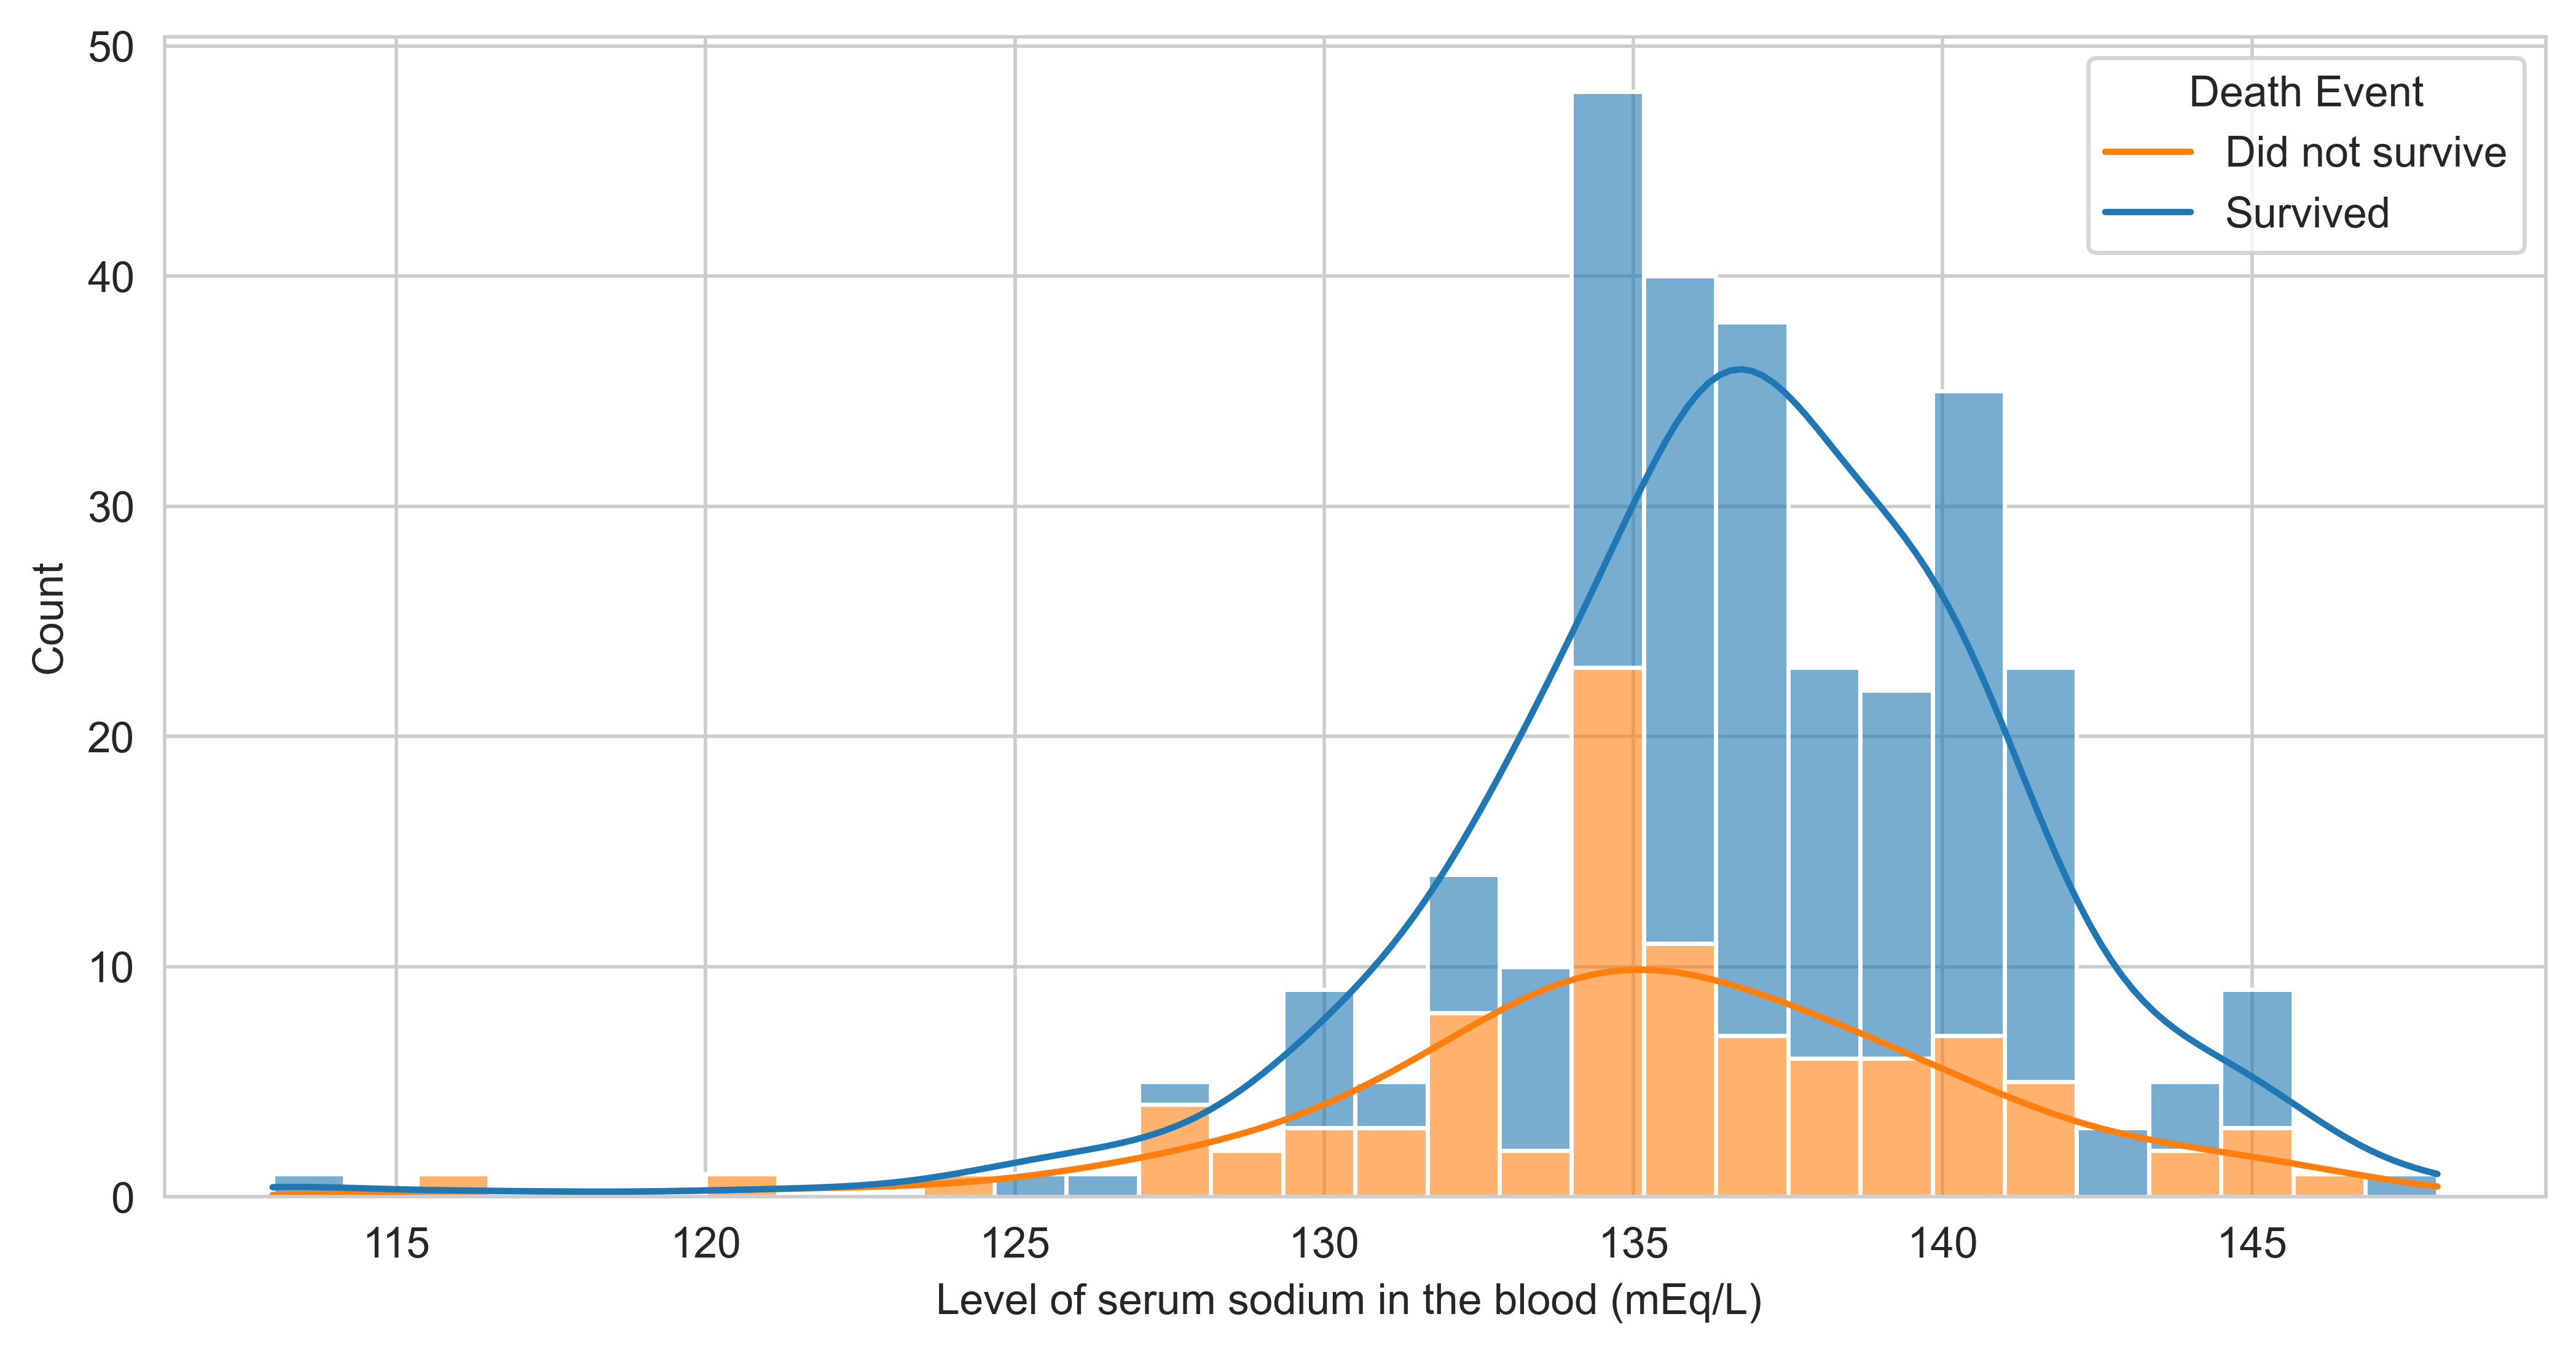

In [12]:
plt.figure(figsize=(10, 5), dpi=500)
sns.histplot(data=df, x='serum_sodium', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Level of serum sodium in the blood (mEq/L) ')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### `sex ` Feature Analysis

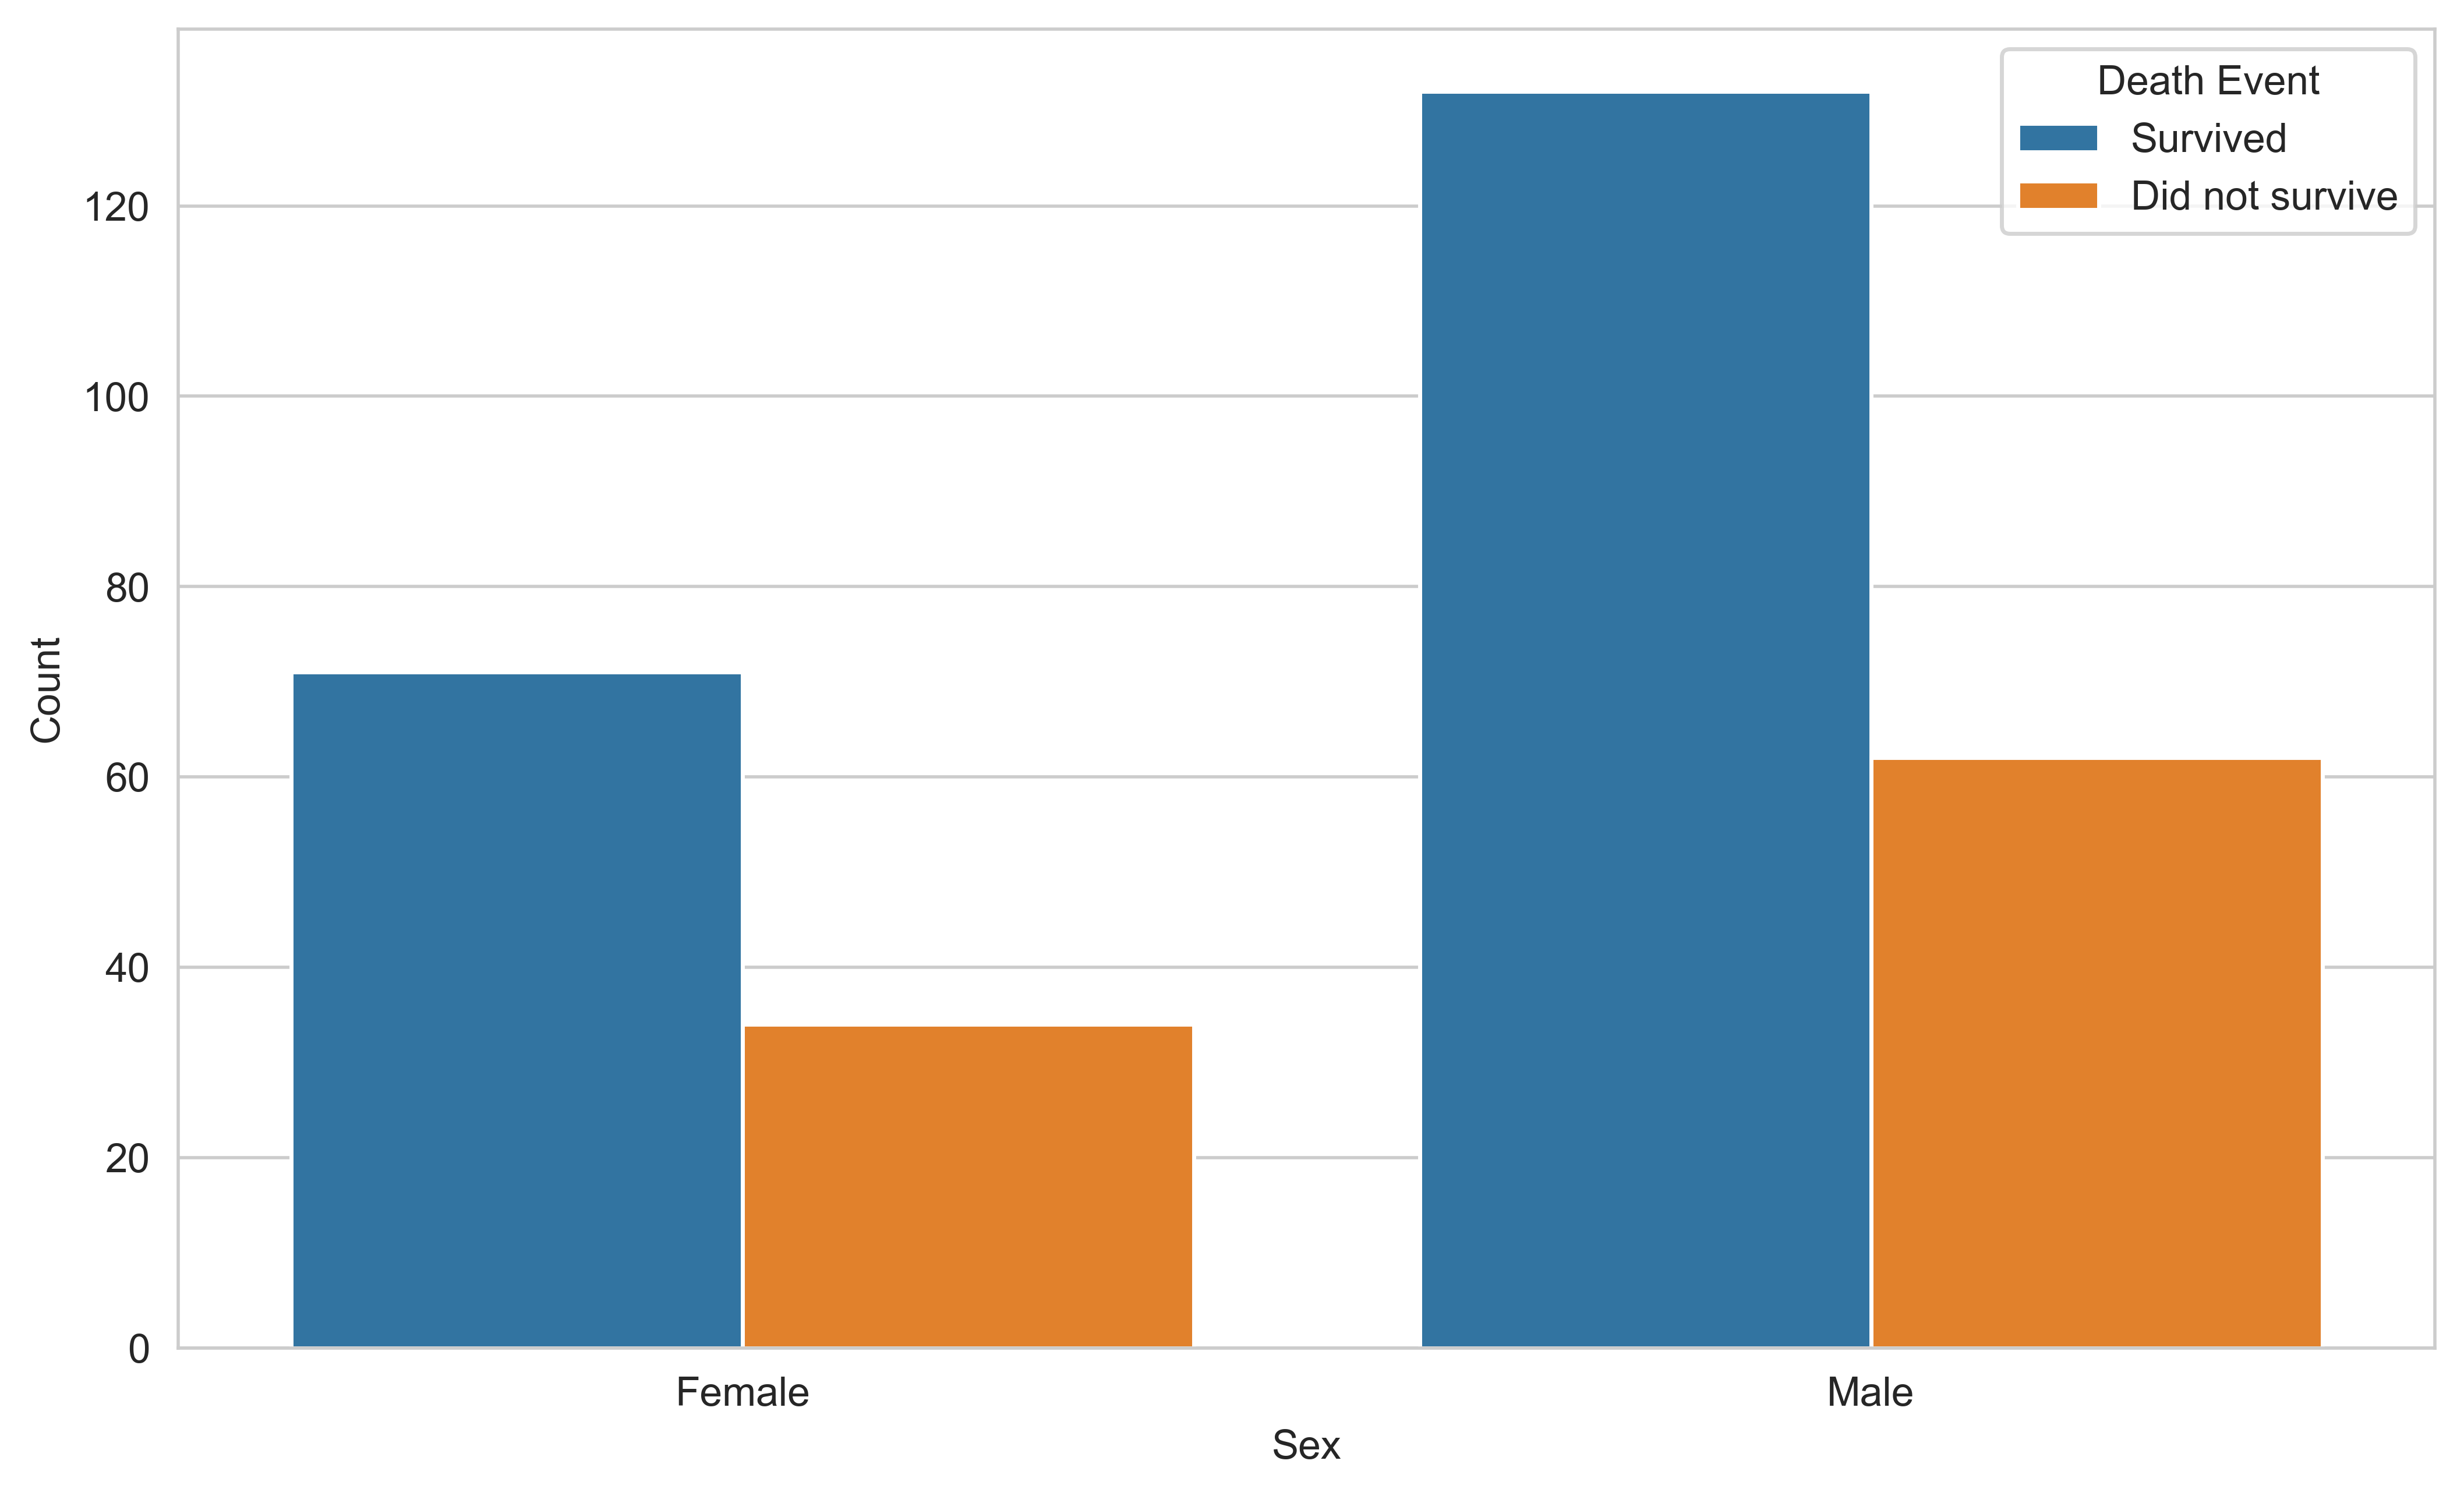

In [13]:
plt.figure(figsize=(10,6), dpi=500)
sns.countplot(data=df, x='sex', hue='DEATH_EVENT')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Death Event', loc='best', labels=['Survived', 'Did not survive'])
plt.show()

### `smoking` Feature Analysis

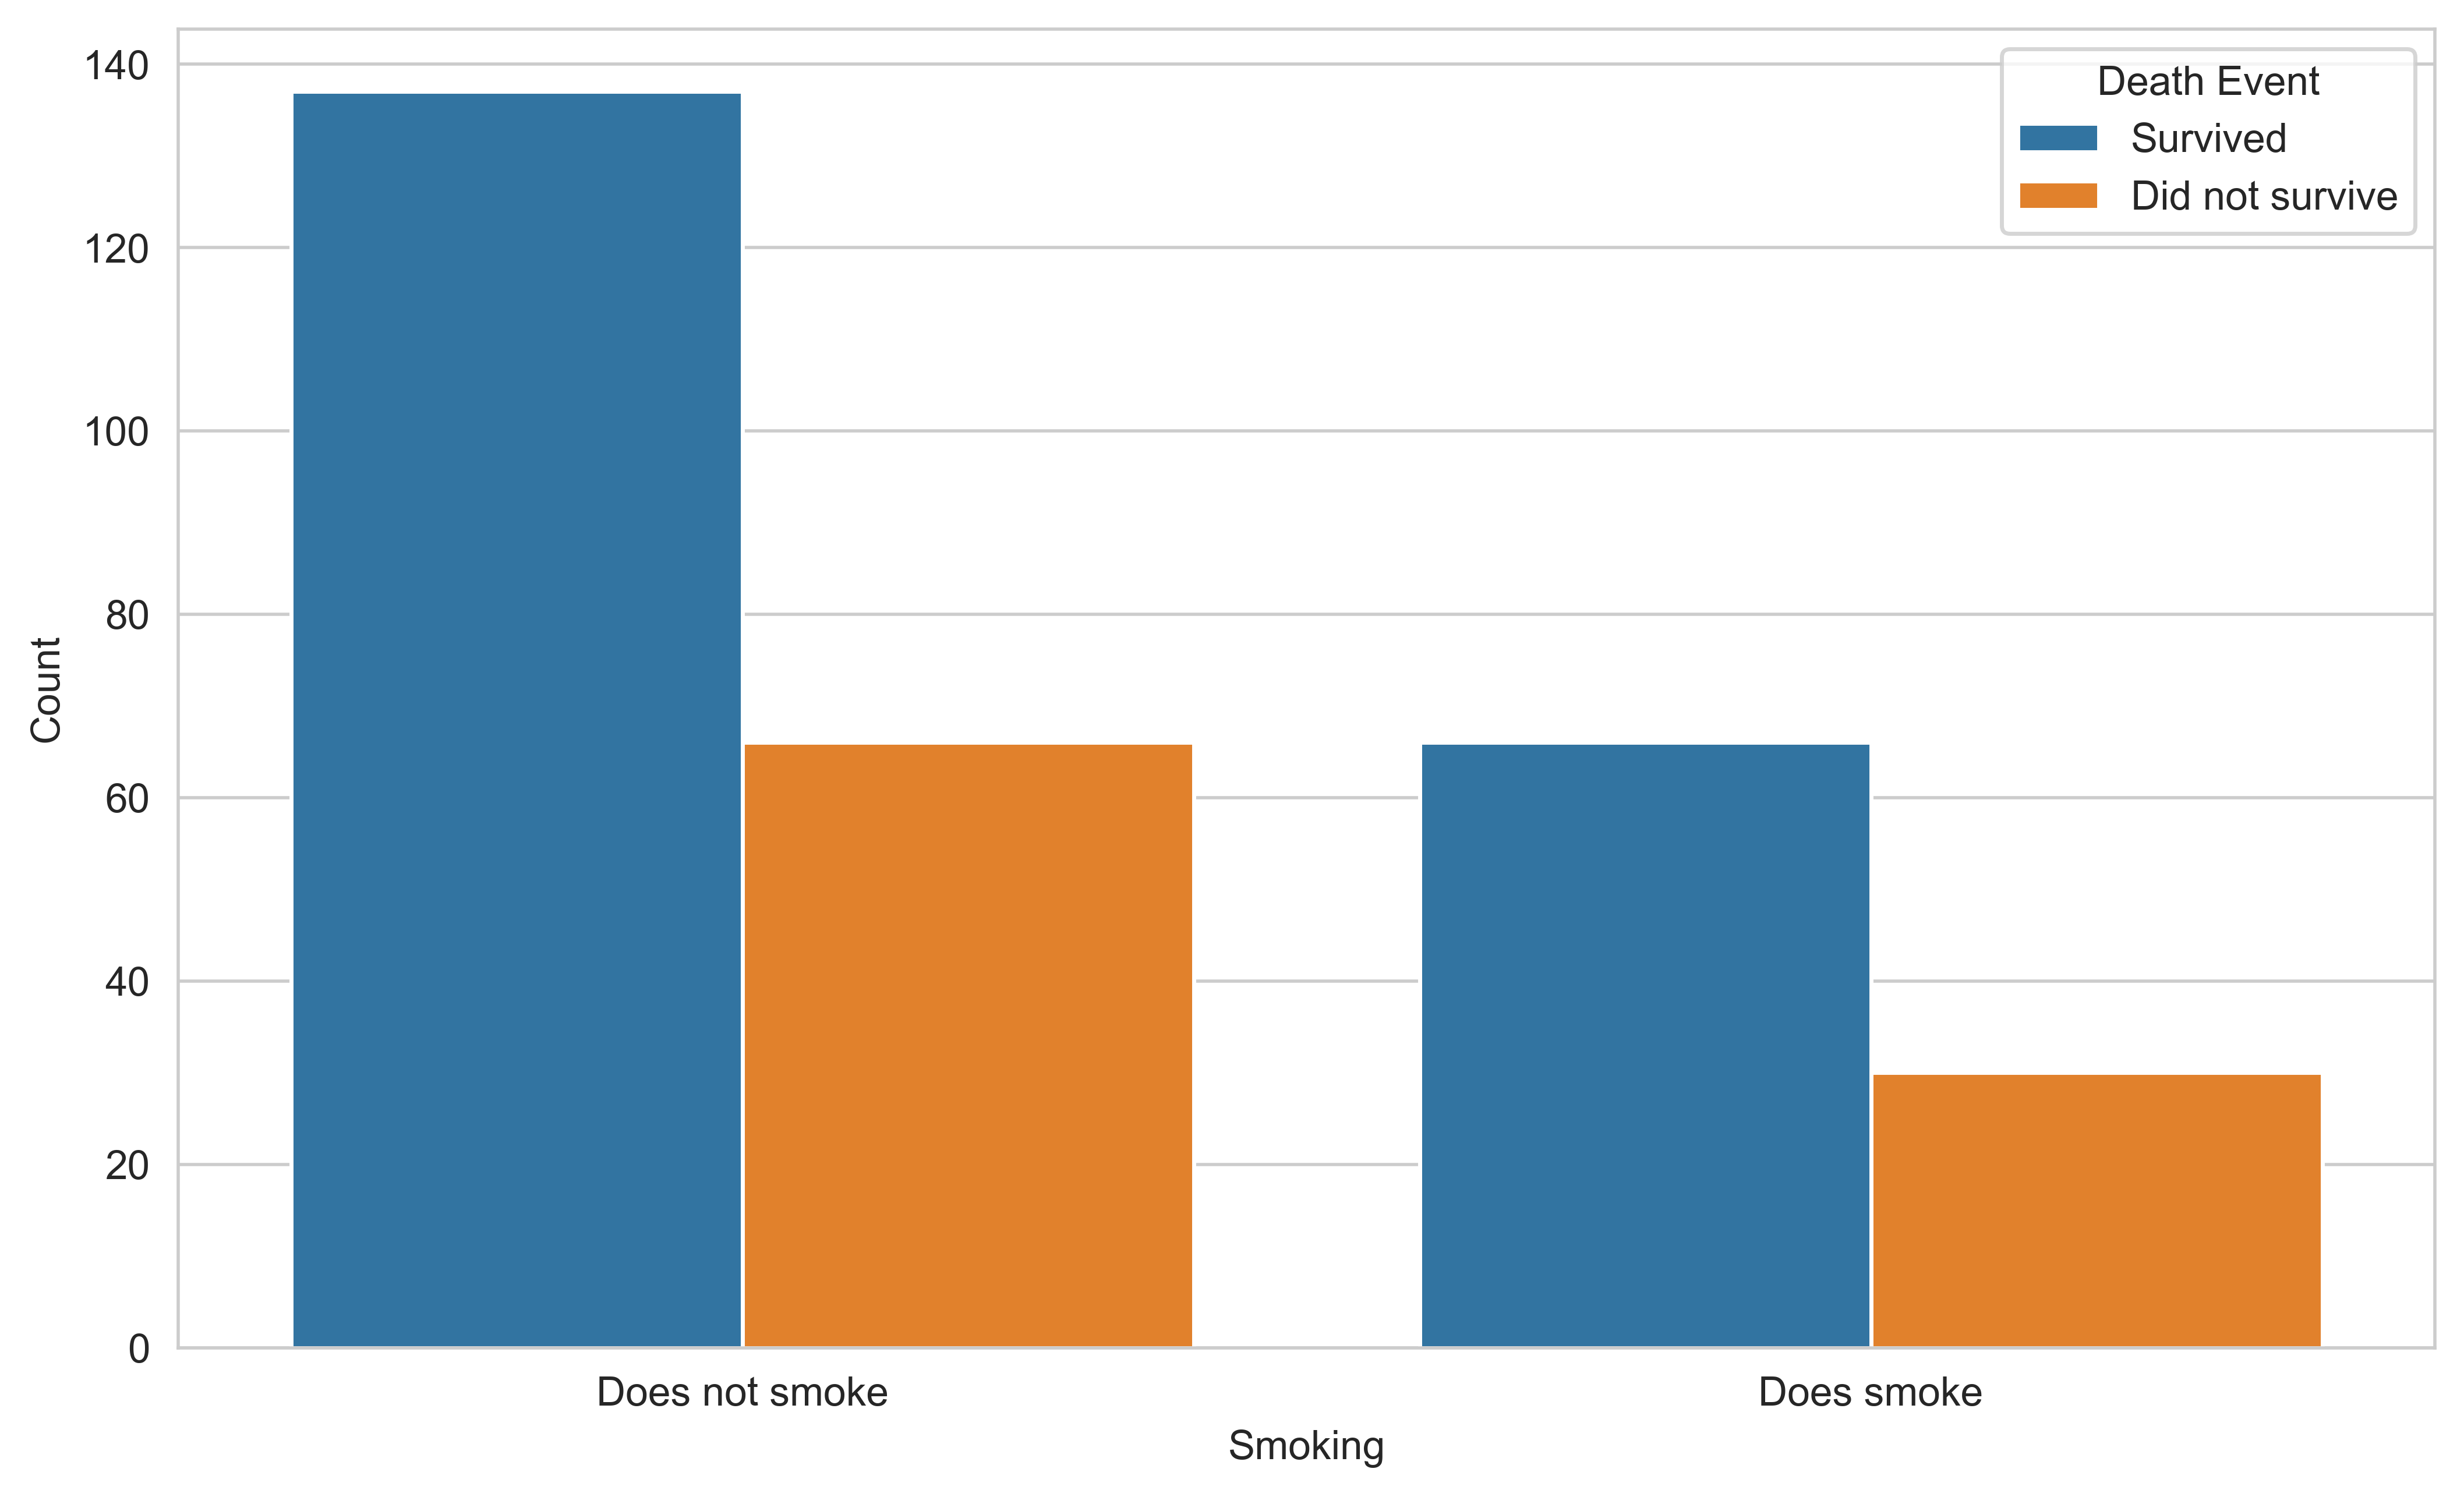

In [14]:
plt.figure(figsize=(10,6), dpi=500)
sns.countplot(data=df, x='smoking', hue='DEATH_EVENT')

plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks([0, 1], ['Does not smoke', 'Does smoke'])
plt.legend(title='Death Event', loc='best', labels=['Survived', 'Did not survive'])
plt.show()

### `time` Feature Analysis

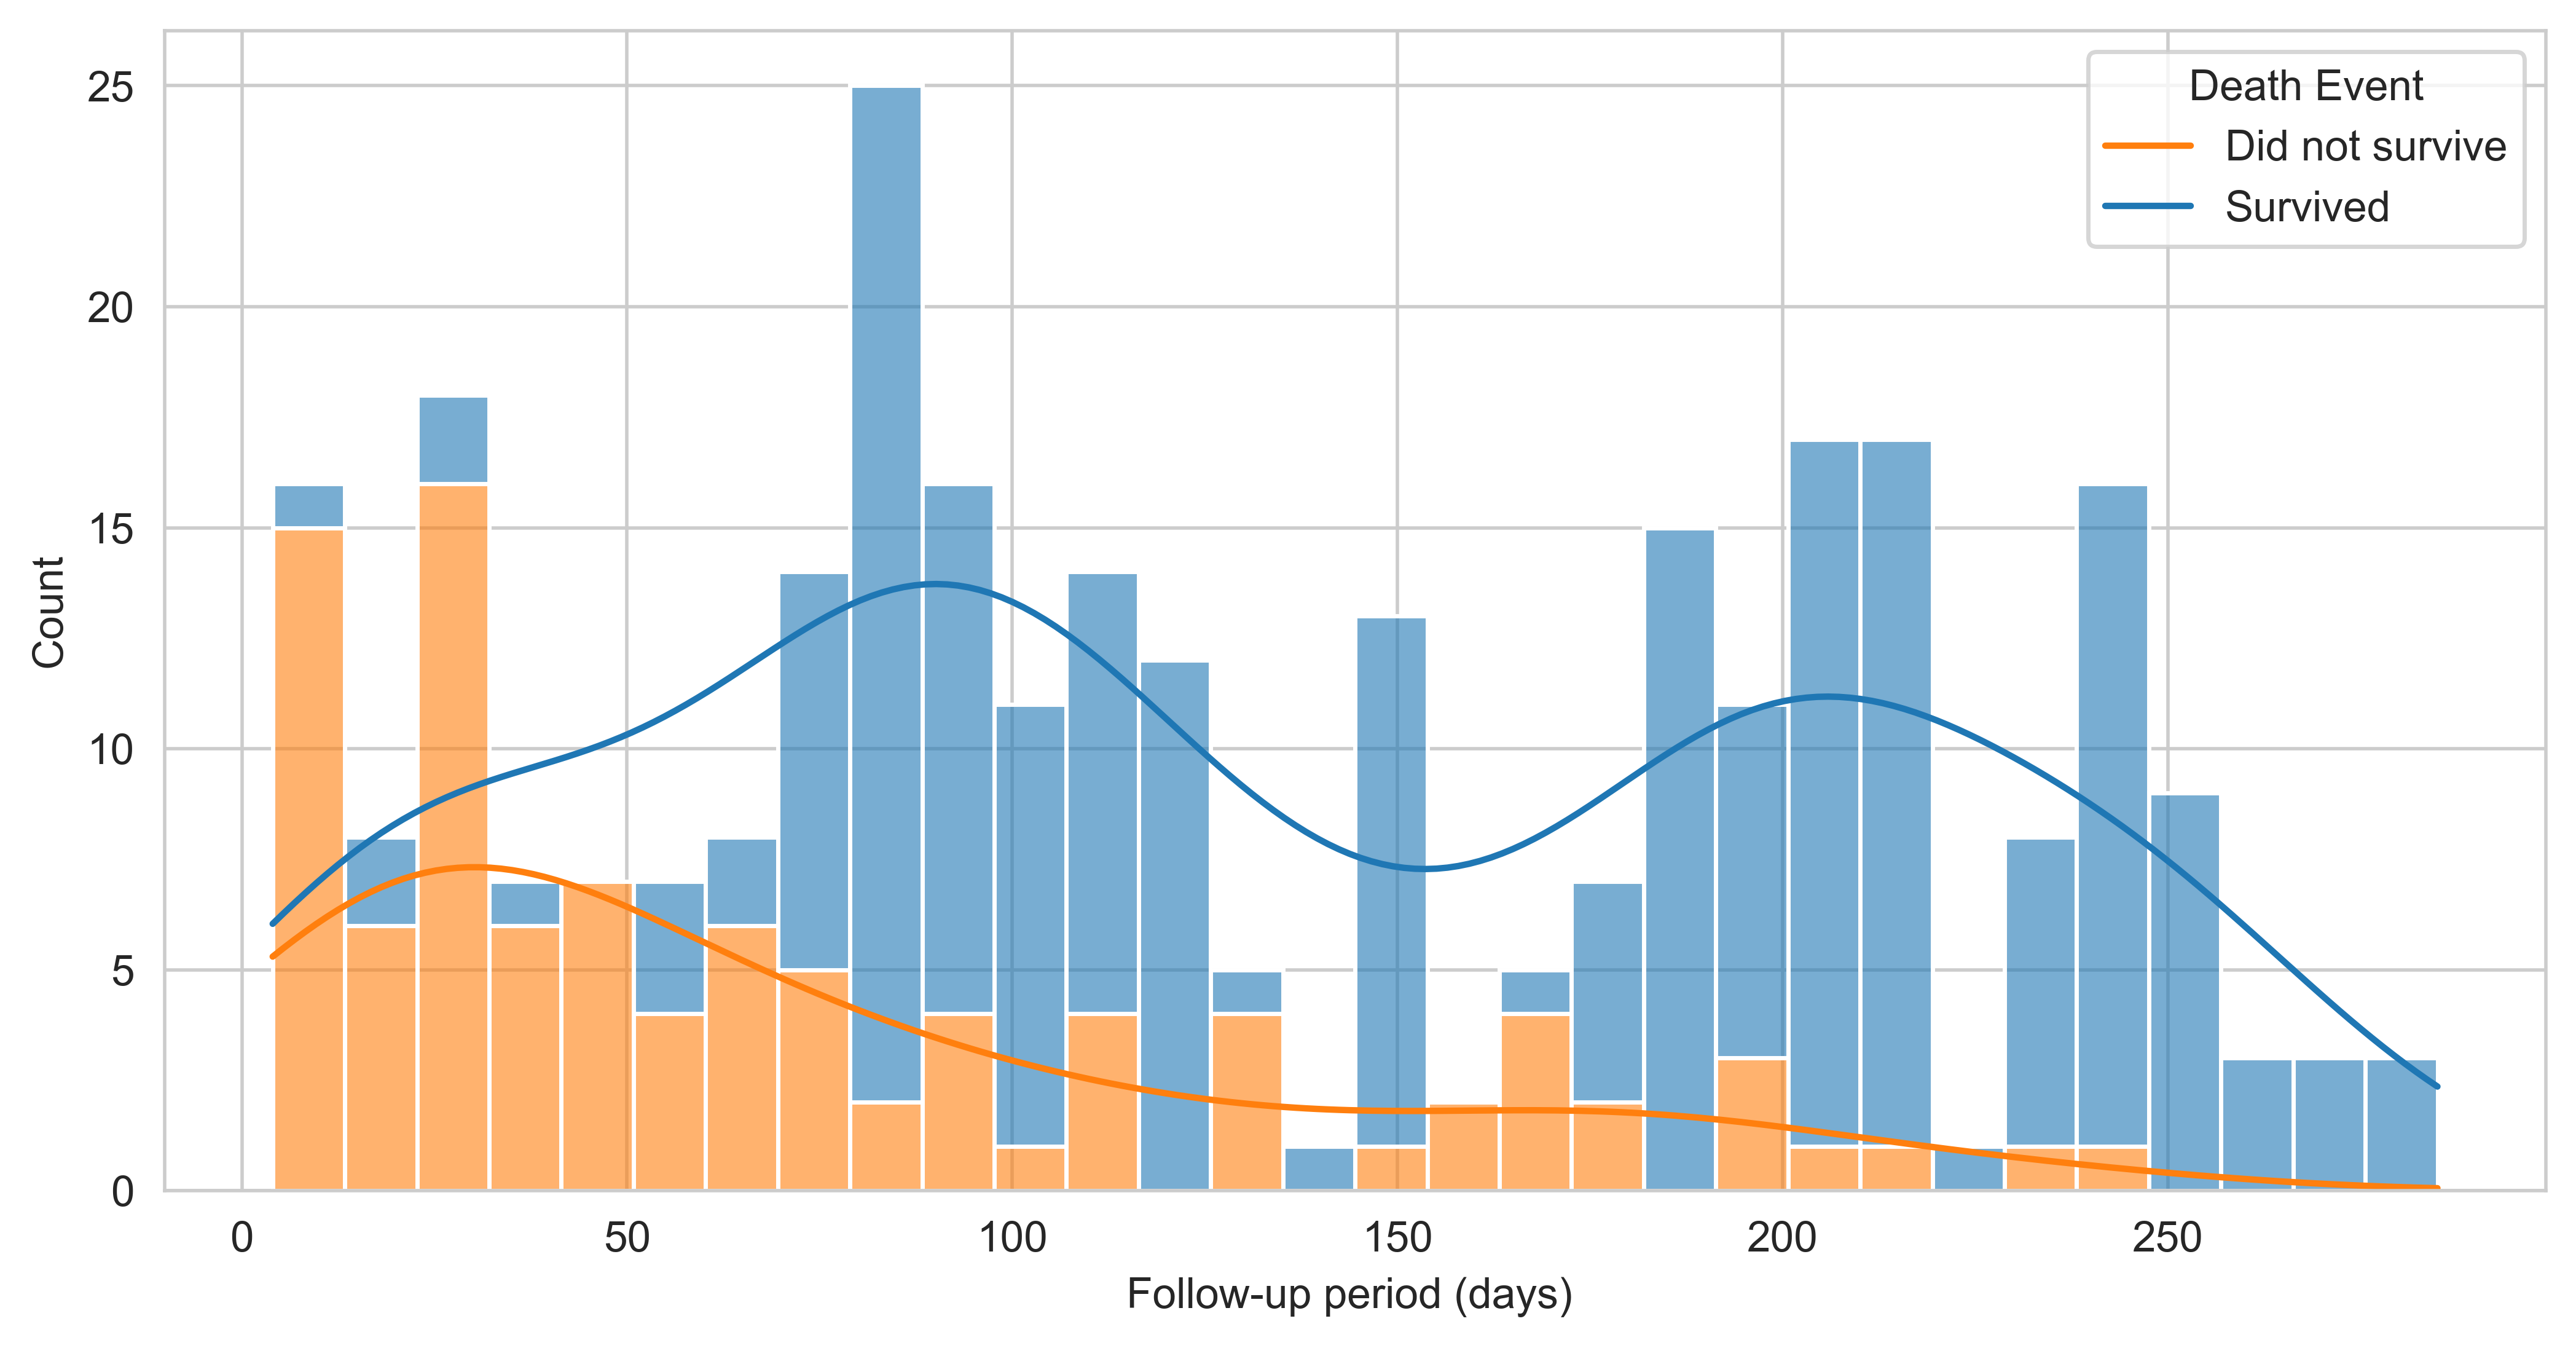

In [15]:
plt.figure(figsize=(10, 5), dpi=500)
sns.histplot(data=df, x='time', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Follow-up period (days) ')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### Correlation Heatmap

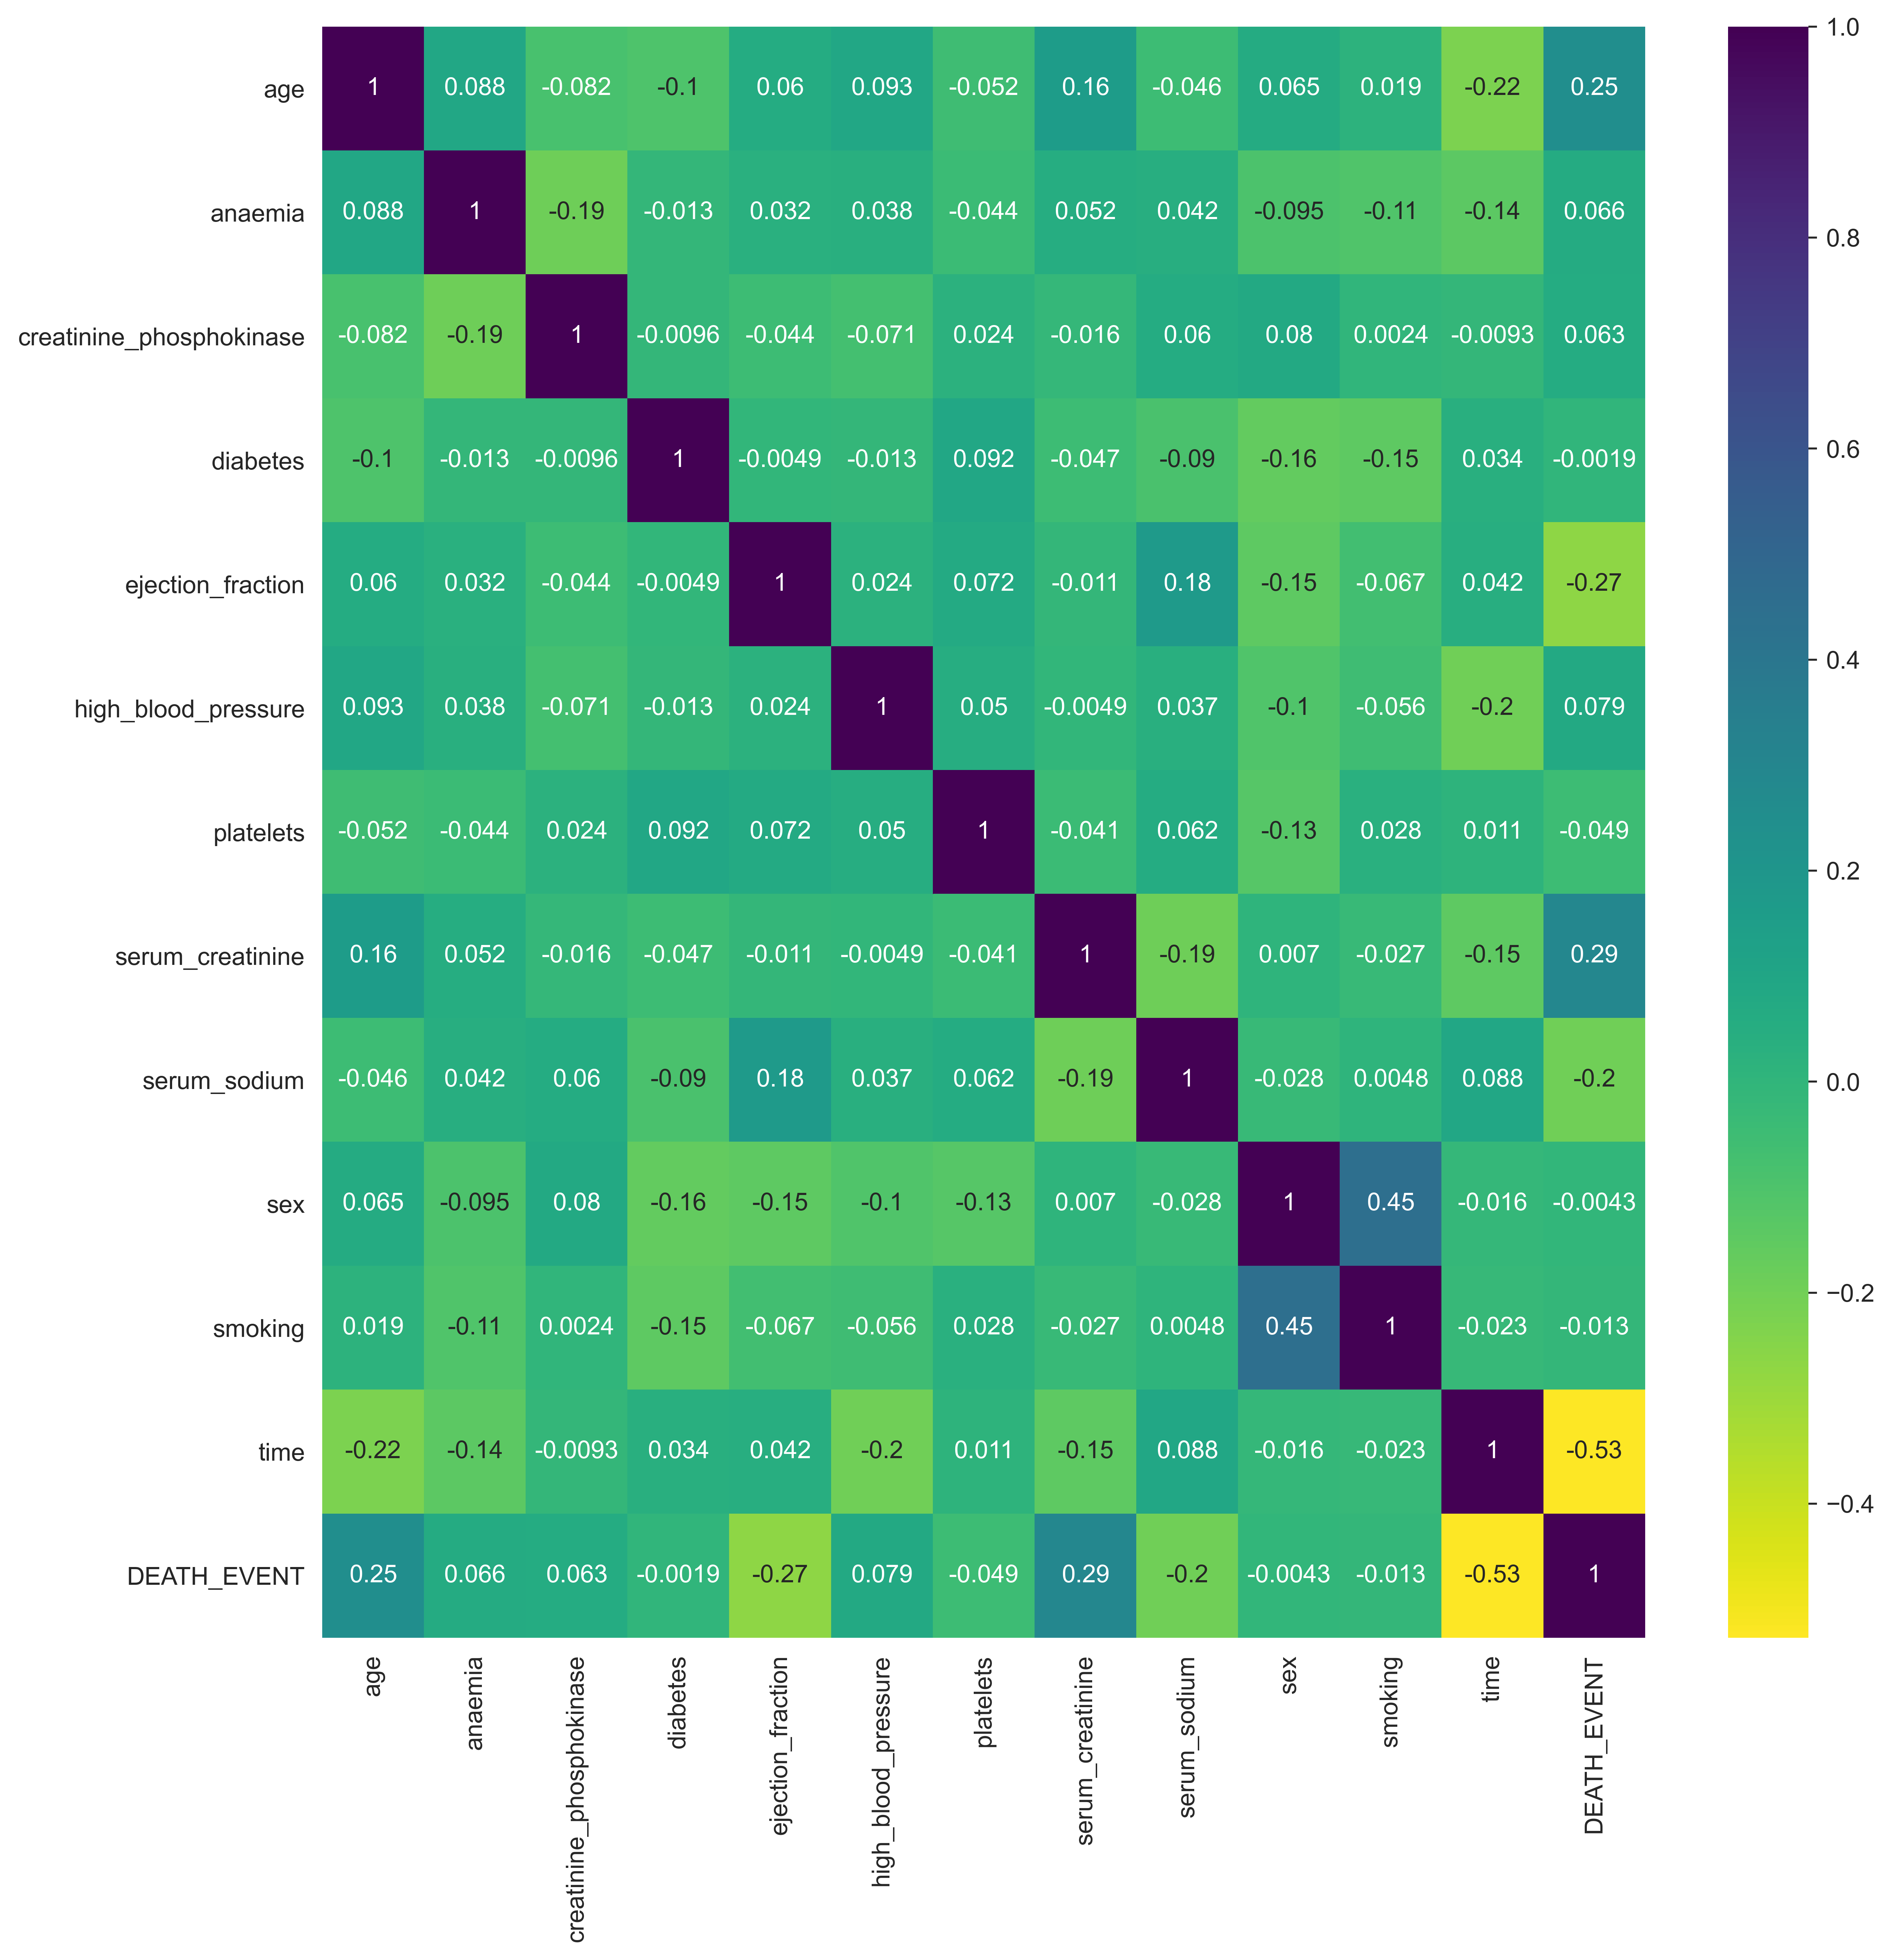

In [16]:
plt.figure(figsize=(12, 12), dpi=500)
sns.heatmap(df.corr(), cmap='viridis_r', annot=True)
plt.show()

### Feature Selection

In [17]:
features = list(df.drop('DEATH_EVENT', axis=1).columns)
X = df[features].values
y = df['DEATH_EVENT'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)

## Applying the Gradient Boosted Decision Tree

### Building the Classifier

In [18]:
from xgboost import XGBRFClassifier
xgbrf = XGBRFClassifier(learning_rate=0.01, subsample=1, max_depth=8, random_state=0)

### Training the Classifier on the Training Set

In [19]:
xgbrf.fit(X_train, y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.01,
                max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                random_state=0, reg_alpha=0, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None)

### Predicting New Results

In [20]:
y_pred = xgbrf.predict(X_test)

### Assessing Model Performance

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
print('Classification Report:\n{}'.format(classification_report(y_test, y_pred)))

Confusion Matrix:
[[40  1]
 [ 4 15]]


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.94      0.79      0.86        19

    accuracy                           0.92        60
   macro avg       0.92      0.88      0.90        60
weighted avg       0.92      0.92      0.91        60



### Feature Importances

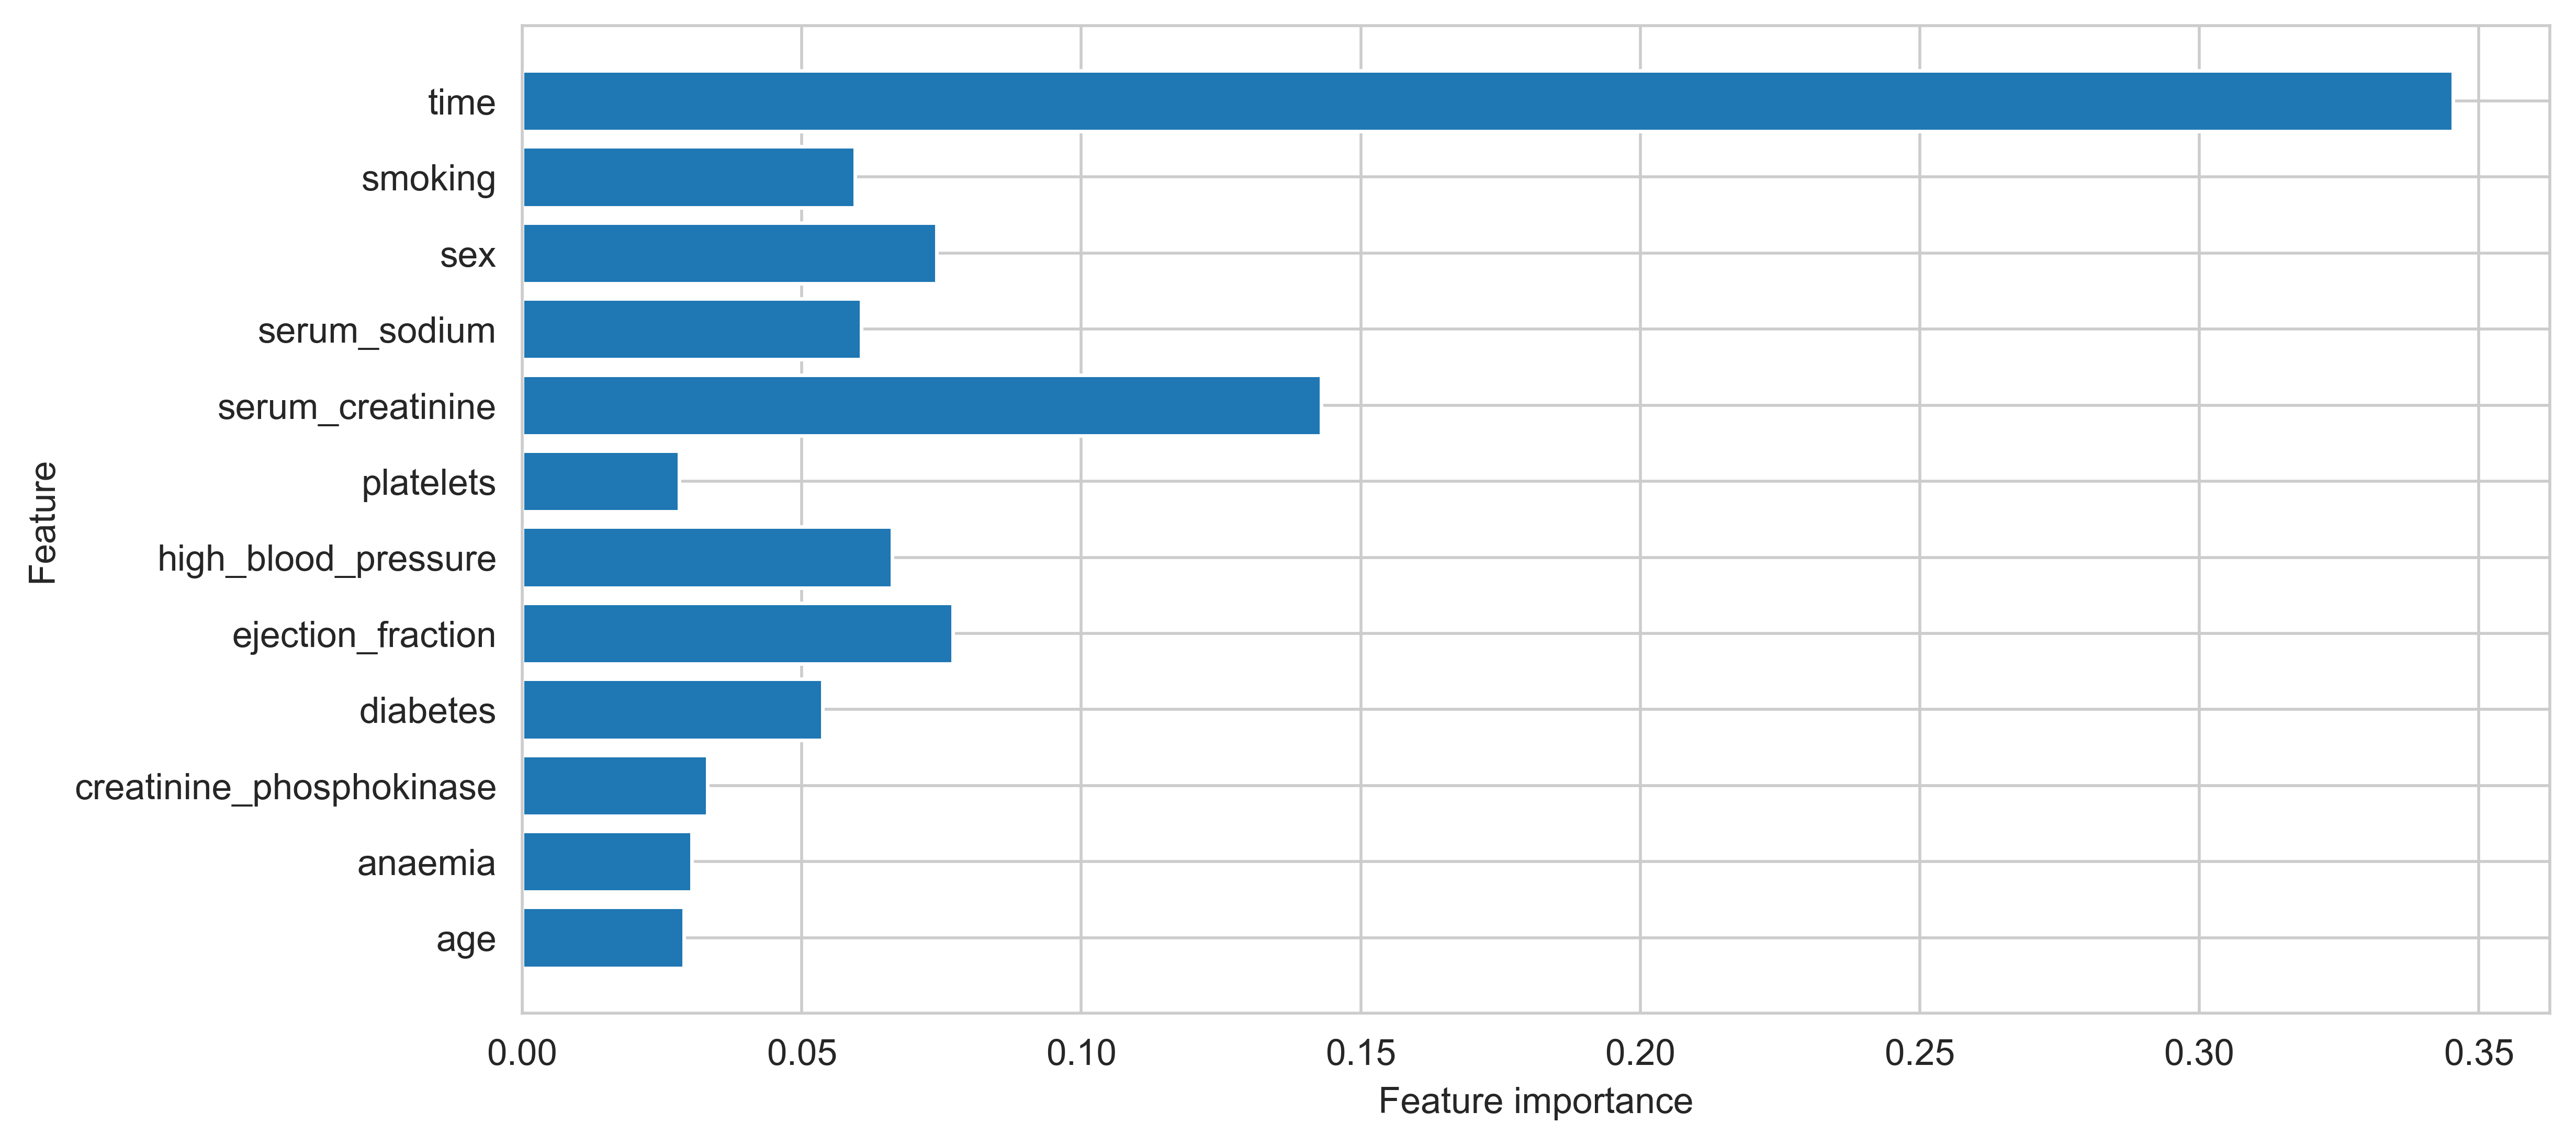

In [22]:
plt.figure(figsize=(10, 5), dpi=500)
plt.barh(range(len(features)), xgbrf.feature_importances_, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()